# Segunda Entrega – Análisis Exploratorio

#### Grupo 18-5k10

#### Integrantes:

*   Ambrogetti, Ignacio
*   Licciardi, Ignacio
*   Pelegrina, Theo

# Formato y Estructura

Formato del dataset:
- El dataset está almacenado en formato CSV (Comma-Separated Values)

Estructura general:
- Datos organizados en un dataframe
- Cada fila representa un partido de fútbol único (fixture)
- Cubre múltiples temporadas de la Liga Argentina
- Incluye tanto estadísticas del partido actual como acumuladas de los equipos

Características de la estructura:
- Temporal: Los partidos están ordenados cronológicamente por fecha
- Comparativo: Para cada partido, se incluyen métricas paralelas para ambos equipos (local vs visitante)
- Acumulativo: Muchas variables representan estadísticas acumuladas hasta el momento del partido

# Variables



**Información básica del partido:**
- `season`: Temporada del campeonato (ej: 2023, 2024)
- `sub_season`: Sub-división de la temporada (ej: "Torneo Largo", "Torneo Corto")
- `fixture_id`: Identificador único del partido
- `fecha_del_partido`: Fecha en que se jugó el partido
- `round`: Jornada o ronda del campeonato
- `Equipo_local_id` / `Equipo_local`: ID y nombre del equipo que juega de local
- `Equipo_visitante_id` / `Equipo_visitante`: ID y nombre del equipo visitante

**Resultado del partido:**
- `goles_local` / `goles_visitante`: Goles marcados por cada equipo
- `Resultado`: Resultado final ("local", "visitante" o "empate")

**Estadísticas del partido:**
- `Tiros_a_puerta_local/visitante`: Tiros al arco durante el partido
- `Faltas_local/visitante`: Número de faltas cometidas
- `Tarjetas_amarillas/rojas_local/visitante`: Tarjetas disciplinarias

**Estadísticas acumuladas del equipo (hasta el momento del partido):**
- `Partidos_jugados_local/visitante`: Total de partidos jugados por el equipo
- `Victorias/Empates/Derrotas_local_en_casa/visitante_fuera`: Partidos ganados/empatados/perdidos como local/fuera
- `Goles_marcados/recibidos_totales_local/visitante`: Goles marcados/recibidos acumulados
- `Promedio_Goles_marcados/recibidos_local_en_casa/visitante_fuera`: Promedio de goles por partido
- `Valla_invicta_local/visitante`: Número de partidos sin recibir gol
- `Forma_local/visitante`: Indicador de forma reciente (probablemente puntos en últimos partidos)
- `Diferencia_gol_total_local/visitante`: Diferencia total entre goles marcados y recibidos
- `puntuacion_total_local/visitante`: Puntos totales acumulados en el campeonato

# Cargar librerias y dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Leemos el archivo CSV y lo almacenamos en un DataFrame
!gdown 1xqBHvrjmJdjeqmYlgqz6R1kebU96B7Mw
df = pd.read_csv('liga_argentina_csv_final.csv')

Downloading...
From: https://drive.google.com/uc?id=1xqBHvrjmJdjeqmYlgqz6R1kebU96B7Mw
To: /content/liga_argentina_csv_final.csv
100% 841k/841k [00:00<00:00, 115MB/s]


# Insepccion del dataset

In [ ]:
# Filas, columnas
df.shape

(4106, 44)

In [ ]:
# Primeras 5 filas
df.head()


,season,sub_season,fixture_id,fecha_del_partido,round,Equipo_local_id,Equipo_local,Equipo_visitante_id,Equipo_visitante,goles_local,...,Promedio_Goles_recibidos_local_en_casa,Promedio_Goles_recibidos_visitante_fuera,Valla_invicta_local,Valla_invicta_visitante,Forma_local,Forma_visitante,Diferencia_gol_total_local,Diferencia_gol_total_visitante,puntuacion_total_local,puntuacion_total_visitante
0,2015,1,187843,2015-02-13 21:00:00+00:00,Regular Season - 1,438,Velez Sarsfield,463,Aldosivi,2,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0
1,2015,1,187844,2015-02-14 00:10:00+00:00,Regular Season - 1,436,Racing Club,437,Rosario Central,0,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0
2,2015,1,187846,2015-02-14 20:00:00+00:00,Regular Season - 1,434,Gimnasia L.P.,442,Defensa Y Justicia,0,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0
3,2015,1,187845,2015-02-14 20:00:00+00:00,Regular Season - 1,460,San Lorenzo,448,Colon Santa Fe,2,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0
4,2015,1,187847,2015-02-14 22:15:00+00:00,Regular Season - 1,439,Godoy Cruz,461,San Martin S.J.,1,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0


In [ ]:
# Ultimas 5 filas
df.tail()

,season,sub_season,fixture_id,fecha_del_partido,round,Equipo_local_id,Equipo_local,Equipo_visitante_id,Equipo_visitante,goles_local,...,Promedio_Goles_recibidos_local_en_casa,Promedio_Goles_recibidos_visitante_fuera,Valla_invicta_local,Valla_invicta_visitante,Forma_local,Forma_visitante,Diferencia_gol_total_local,Diferencia_gol_total_visitante,puntuacion_total_local,puntuacion_total_visitante
4101,2025,1,1375311,2025-05-20 00:30:00+00:00,1st Phase - Quarter-finals,451,Boca Juniors,453,Independiente,0,...,0.222,1.250,7,1,DDLWW,WLLDW,13,12,34,32
4102,2025,1,1375312,2025-05-20 23:30:00+00:00,1st Phase - Quarter-finals,435,River Plate,1064,Platense,1,...,0.700,0.667,5,4,WWWWD,WLWWD,15,3,34,26
4103,2025,1,1376084,2025-05-24 21:30:00+00:00,1st Phase - Semi-finals,453,Independiente,445,Huracan,0,...,0.222,0.778,7,4,WWLLD,WWLLD,13,9,35,33
4104,2025,1,1376085,2025-05-25 19:00:00+00:00,1st Phase - Semi-finals,460,San Lorenzo,1064,Platense,0,...,0.889,0.700,3,4,DWDLD,DWLWW,5,3,31,27
4105,2025,1,1376552,2025-06-01 20:00:00+00:00,1st Phase - Final,445,Huracan,1064,Platense,0,...,0.778,0.636,5,5,DWWLL,WDWLW,9,4,34,30


In [ ]:
# Resumen del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   season                                    4106 non-null   int64  
 1   sub_season                                4106 non-null   int64  
 2   fixture_id                                4106 non-null   int64  
 3   fecha_del_partido                         4106 non-null   object 
 4   round                                     4106 non-null   object 
 5   Equipo_local_id                           4106 non-null   int64  
 6   Equipo_local                              4106 non-null   object 
 7   Equipo_visitante_id                       4106 non-null   int64  
 8   Equipo_visitante                          4106 non-null   object 
 9   goles_local                               4106 non-null   int64  
 10  goles_visitante                     

Aca detectamos que la fecha del partido es un object (string). Si lo dejamos asi puede que en el futuro nos sea mas dificil hacer algunos calculos, o extraer año mes hora etc. Por lo tanto decidimos convertirla a datetime a continuación.

# Algunos ajustes iniciales al dataset

### Convertir fecha_del_partido a datetime

In [ ]:
df['fecha_del_partido'] = pd.to_datetime(df['fecha_del_partido'])
df["fecha_del_partido"].dtype

datetime64[ns, UTC]

### Ver si hay valores nulos en el dataset y analizar si debemos llenar y como

In [ ]:
df.isna().sum()

,0
season,0
sub_season,0
fixture_id,0
fecha_del_partido,0
round,0
Equipo_local_id,0
Equipo_local,0
Equipo_visitante_id,0
Equipo_visitante,0
goles_local,0


Podemos ver que hay varias columnas con valores nulos, notamos que lo que es tarjetas, faltas y tiros a puerta tendramos que llenarlos con ceros, pero debemos explorar un poco mas lo que "Forma local" y "Forma visitante".

### Explorar "Forma local" y "Forma visitante"

In [ ]:
df[df['Forma_local'].isnull() | df['Forma_visitante'].isnull()][['fecha_del_partido', 'Equipo_local', 'Equipo_visitante', 'Forma_local', 'Forma_visitante']]

,fecha_del_partido,Equipo_local,Equipo_visitante,Forma_local,Forma_visitante
0,2015-02-13 21:00:00+00:00,Velez Sarsfield,Aldosivi,NaN,NaN
1,2015-02-14 00:10:00+00:00,Racing Club,Rosario Central,NaN,NaN
2,2015-02-14 20:00:00+00:00,Gimnasia L.P.,Defensa Y Justicia,NaN,NaN
3,2015-02-14 20:00:00+00:00,San Lorenzo,Colon Santa Fe,NaN,NaN
4,2015-02-14 22:15:00+00:00,Godoy Cruz,San Martin S.J.,NaN,NaN
...,...,...,...,...,...
3861,2025-01-25 22:15:00+00:00,Instituto Cordoba,Gimnasia L.P.,NaN,NaN
3862,2025-01-25 22:15:00+00:00,Estudiantes L.P.,Union Santa Fe,NaN,NaN
3863,2025-01-26 00:30:00+00:00,Platense,River Plate,NaN,NaN
3864,2025-01-26 22:00:00+00:00,Boca Juniors,Argentinos JRS,NaN,NaN


Como en los partidos al inicio de la temporada no se tienen partidos anteriores de la misma temporada, entonces la forma de estos dos campos en la mayoria de los partidos iniciales serán nulos. ¿Se deben dejar nulos o hacer otra cosa?

### Llenar con 0 aquellas columnas numericas

Los tiros a puerta, faltas y tarjetas, tienen sentido que sean 0, en vez de nulos. Por lo tanto decidimos llenar estos valores nulos con ceros.

In [ ]:
columns_to_fill_with_zero = [
    'Tiros_a_puerta_local',
    'Tiros_a_puerta_visitante',
    'Faltas_local',
    'Faltas_visitante',
    'Tarjetas_amarillas_local',
    'Tarjetas_amarillas_visitante',
    'Tarjetas_rojas_local',
    'Tarjetas_rojas_visitante'
]

df[columns_to_fill_with_zero] = df[columns_to_fill_with_zero].fillna(0)

df.isna().sum()

,0
season,0
sub_season,0
fixture_id,0
fecha_del_partido,0
round,0
Equipo_local_id,0
Equipo_local,0
Equipo_visitante_id,0
Equipo_visitante,0
goles_local,0


# Analisis de los datos

### Cantidad de equipos en el dataset

In [ ]:
todos_los_equipos = pd.concat([df.Equipo_local, df.Equipo_visitante]).unique()

num_equipos = len(todos_los_equipos)

num_equipos

41

### Cantidad de partidos por temporada

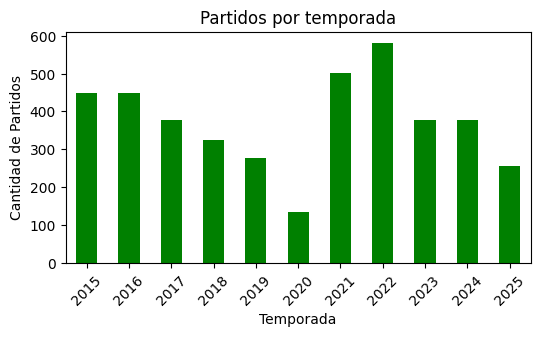

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

df['season'].value_counts().sort_index().plot(kind='bar', ax=ax, color='green')
ax.set_title('Partidos por temporada')
ax.set_xlabel('Temporada')
ax.set_ylabel('Cantidad de Partidos')
ax.tick_params(axis='x', rotation=45)

plt.show()

### Los 10 equipos con mas victorias y los 10 equipos con mas derrotas
#### Correccion: ahora se toma la cantidad de victorias/derrotas sobre el total de partidos, por lo tanto queda normalizado. Antes al no tomar la cantidad de partidos jugados los graficos no estaban diciendo la verdad.

Top 10 equipos con mayor porcentaje de victorias:
Equipo_local
Boca Juniors       71.430
River Plate        71.430
Racing Club        67.860
Banfield           64.290
Estudiantes L.P.   60.710
Independiente      60.710
Rosario Central    60.710
San Lorenzo        57.140
Talleres Cordoba   57.140
Newells Old Boys   53.570
dtype: float64

Top 10 equipos con mayor porcentaje de derrotas:
Equipo_local
Crucero Del Norte     71.430
Arsenal Sarandi       67.860
Olimpo Bahia Blanca   64.290
Aldosivi              60.710
Argentinos JRS        60.710
Chacarita Juniors     60.000
Gimnasia L.P.         57.140
Temperley             57.140
Sarmiento Junin       57.140
Quilmes               57.140
dtype: float64


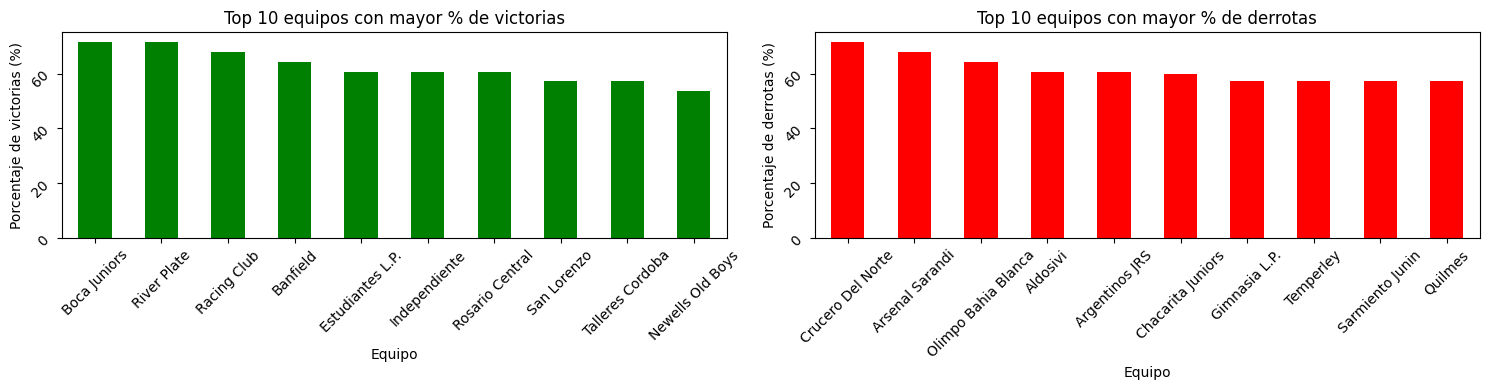

In [ ]:
# Calcular victorias y derrotas totales por equipo (tomando el máximo ya que son acumulativas)
victorias_local = df.groupby('Equipo_local')['Victorias_local_en_casa'].max()
victorias_visitante = df.groupby('Equipo_visitante')['Victorias_visitante_fuera'].max()

derrotas_local = df.groupby('Equipo_local')['Derrotas_local_en_casa'].max()
derrotas_visitante = df.groupby('Equipo_visitante')['Derrotas_visitante_fuera'].max()

# Calcular partidos jugados totales por equipo
partidos_local = df.groupby('Equipo_local')['Partidos_jugados_local'].max()
partidos_visitante = df.groupby('Equipo_visitante')['Partidos_jugados_visitante'].max()

# Sumar victorias, derrotas y partidos totales
total_victorias = victorias_local.add(victorias_visitante, fill_value=0)
total_derrotas = derrotas_local.add(derrotas_visitante, fill_value=0)
total_partidos = partidos_local.add(partidos_visitante, fill_value=0)

# Normalizar por porcentaje de victorias y derrotas
porcentaje_victorias = (total_victorias / total_partidos * 100).fillna(0)
porcentaje_derrotas = (total_derrotas / total_partidos * 100).fillna(0)

# Top 10 equipos con mayor porcentaje de victorias y derrotas
top_10_victorias_pct = porcentaje_victorias.sort_values(ascending=False).head(10)
top_10_derrotas_pct = porcentaje_derrotas.sort_values(ascending=False).head(10)

print("Top 10 equipos con mayor porcentaje de victorias:")
print(top_10_victorias_pct.round(2))
print("\nTop 10 equipos con mayor porcentaje de derrotas:")
print(top_10_derrotas_pct.round(2))

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

top_10_victorias_pct.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Top 10 equipos con mayor % de victorias')
axes[0].set_xlabel('Equipo')
axes[0].set_ylabel('Porcentaje de victorias (%)')
axes[0].tick_params(rotation=45)

top_10_derrotas_pct.plot(kind='bar', color="red", ax=axes[1])
axes[1].set_title('Top 10 equipos con mayor % de derrotas')
axes[1].set_xlabel('Equipo')
axes[1].set_ylabel('Porcentaje de derrotas (%)')
axes[1].tick_params(rotation=45)

plt.tight_layout()
plt.show()

### Visualizaciones Univariadas

#### Analisis de distribucion de resultados

Resultado
Ganador local        1768
Empate               1228
Ganador visitante    1110
Name: count, dtype: int64


Resultado
Ganador local       43.060
Empate              29.910
Ganador visitante   27.030
Name: count, dtype: float64


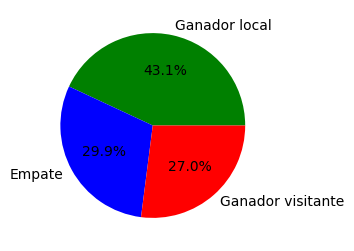

In [ ]:
resultados_dist = df.Resultado.value_counts()
print(resultados_dist)

print(f"\n")
print((resultados_dist / len(df) * 100).round(2))

fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(resultados_dist, labels=resultados_dist.index, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.show()

#### Analisis por temporadas

In [ ]:
partidos_por_temporada = df['season'].value_counts()
print(partidos_por_temporada)

season
2022    581
2021    501
2015    450
2016    450
2017    378
2023    378
2024    378
2018    325
2019    276
2025    255
2020    134
Name: count, dtype: int64


In [ ]:
goles_por_temporada = df.groupby('season').agg({
    'goles_local': 'mean',
    'goles_visitante': 'mean'
}).round(2)
goles_por_temporada['total_goles'] = goles_por_temporada['goles_local'] + goles_por_temporada['goles_visitante']
print(goles_por_temporada)

        goles_local  goles_visitante  total_goles
season                                           
2015          1.260            0.950        2.210
2016          1.250            1.030        2.280
2017          1.290            0.970        2.260
2018          1.250            0.960        2.210
2019          1.240            1.050        2.290
2020          1.250            1.370        2.620
2021          1.380            1.070        2.450
2022          1.290            1.030        2.320
2023          1.200            0.850        2.050
2024          1.210            0.830        2.040
2025          1.180            0.810        1.990


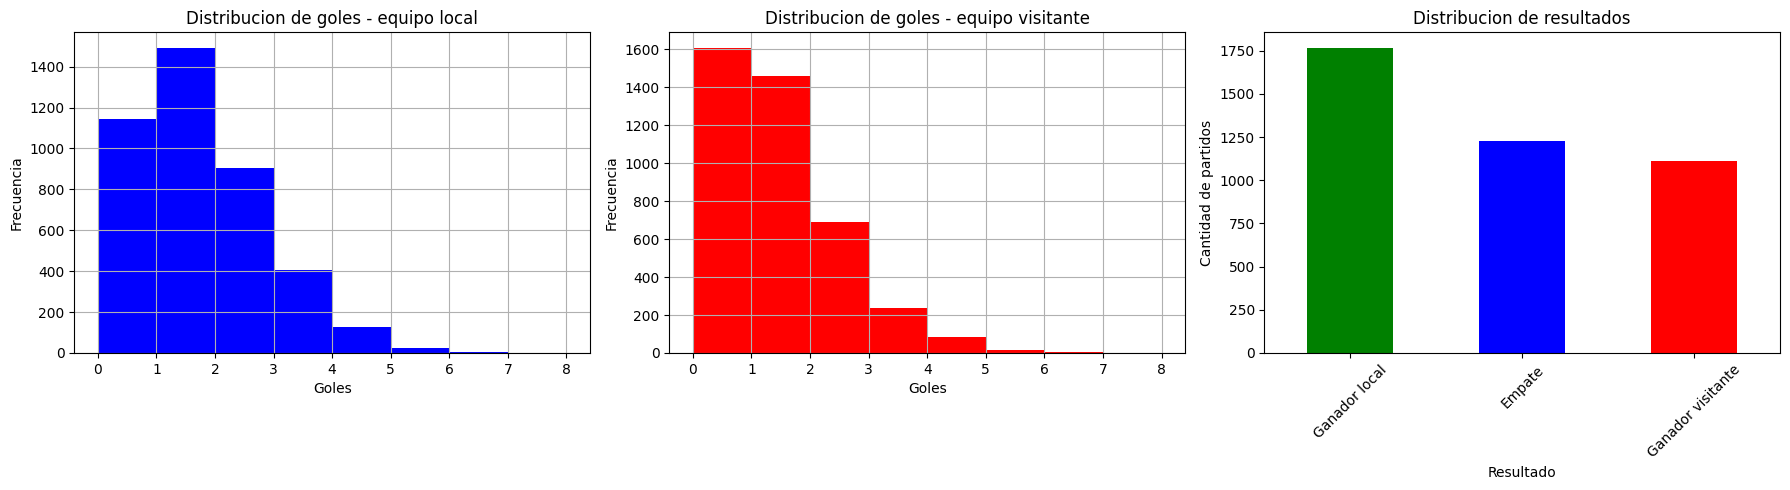

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma de goles locales
df['goles_local'].hist(bins=range(0, 9), ax=axes[0], color='blue')
axes[0].set_title('Distribucion de goles - equipo local')
axes[0].set_xlabel('Goles')
axes[0].set_ylabel('Frecuencia')

# Histograma de goles visitantes
df['goles_visitante'].hist(bins=range(0, 9), ax=axes[1], color='red')
axes[1].set_title('Distribucion de goles - equipo visitante')
axes[1].set_xlabel('Goles')
axes[1].set_ylabel('Frecuencia')

# Distribucion de resultados
df['Resultado'].value_counts().plot(kind='bar', ax=axes[2], color=['green', 'blue', 'red'])
axes[2].set_title('Distribucion de resultados')
axes[2].set_xlabel('Resultado')
axes[2].set_ylabel('Cantidad de partidos')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Concluimos que la cantidad de goles que hacen los equipos, en promedio, es mayor cuando juegan de local. Tambien se puede ver que cuando se gana como visitante, en promedio, se gana con menos goles que cuando se gana como local.

#### Estadisticas del partido

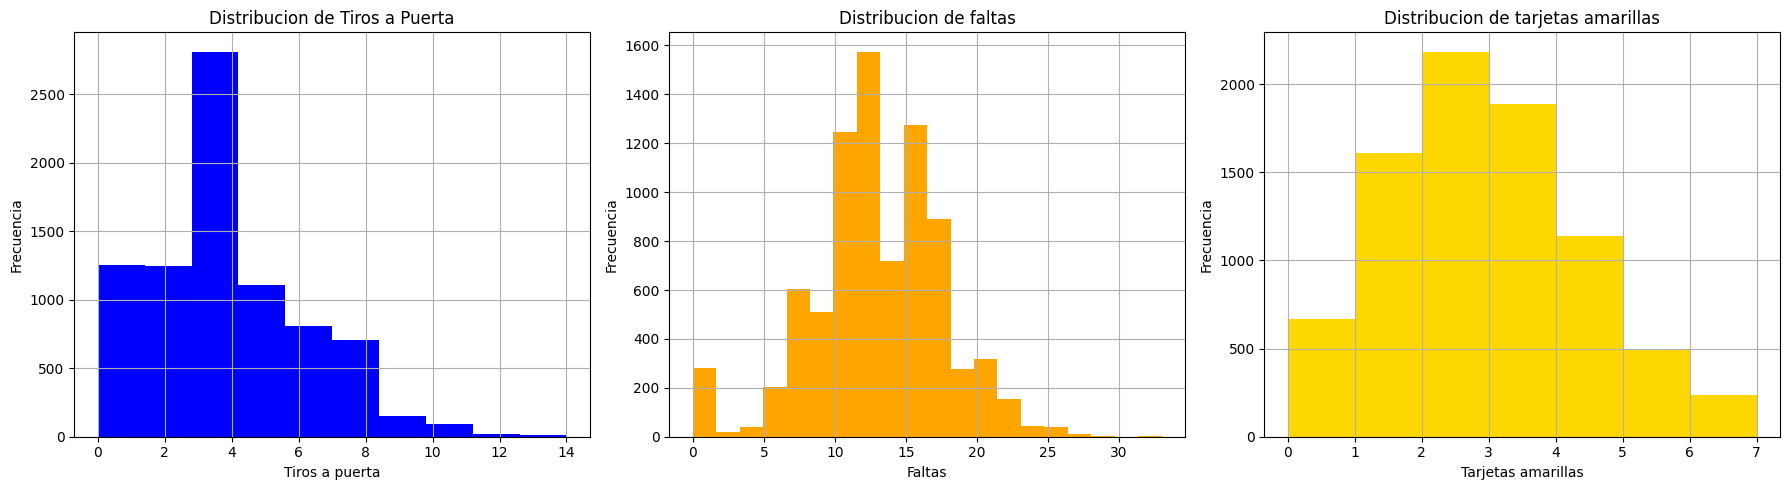

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

tiros_total = pd.concat([df['Tiros_a_puerta_local'], df['Tiros_a_puerta_visitante']])
faltas_total = pd.concat([df['Faltas_local'], df['Faltas_visitante']])
amarillas_total = pd.concat([df['Tarjetas_amarillas_local'], df['Tarjetas_amarillas_visitante']])

# Distribucion de tiros a puerta
tiros_total.hist(bins=10, ax=axes[0], color='blue')
axes[0].set_title('Distribucion de Tiros a Puerta')
axes[0].set_xlabel('Tiros a puerta')
axes[0].set_ylabel('Frecuencia')

# Distribucion de faltas
faltas_total.hist(bins=20, ax=axes[1], color='orange')
axes[1].set_title('Distribucion de faltas')
axes[1].set_xlabel('Faltas')
axes[1].set_ylabel('Frecuencia')

# Distribucion de tarjetas amarillas
amarillas_total.hist(bins=range(0, 8), ax=axes[2], color='gold')
axes[2].set_title('Distribucion de tarjetas amarillas')
axes[2].set_xlabel('Tarjetas amarillas')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Analisis de valla invicta

In [ ]:

df['Valla_invicta_local'].describe()


,Valla_invicta_local
count,"4,106.000"
mean,2.282
std,2.026
min,0.000
25%,1.000
50%,2.000
75%,4.000
max,13.000


In [ ]:
df['Valla_invicta_visitante'].describe()

,Valla_invicta_visitante
count,"4,106.000"
mean,1.605
std,1.571
min,0.000
25%,0.000
50%,1.000
75%,2.000
max,9.000


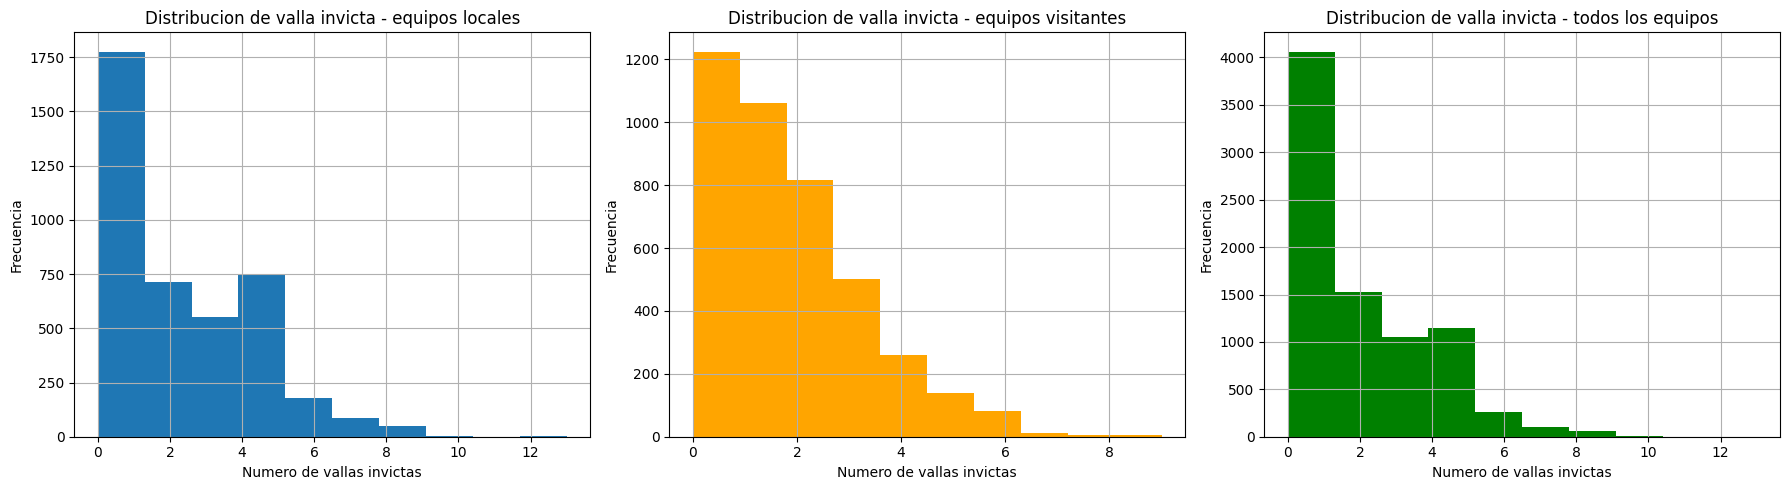

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma de valla invicta local
df['Valla_invicta_local'].hist(bins=10, ax=axes[0])
axes[0].set_title('Distribucion de valla invicta - equipos locales')
axes[0].set_xlabel('Numero de vallas invictas')
axes[0].set_ylabel('Frecuencia')

# Histograma de valla invicta visitante
df['Valla_invicta_visitante'].hist(bins=10, ax=axes[1], color="orange")
axes[1].set_title('Distribucion de valla invicta - equipos visitantes')
axes[1].set_xlabel('Numero de vallas invictas')
axes[1].set_ylabel('Frecuencia')

# Histograma combinado
valla_invicta_total = pd.concat([df['Valla_invicta_local'], df['Valla_invicta_visitante']])
valla_invicta_total.hist(bins=10, ax=axes[2], color='green')
axes[2].set_title('Distribucion de valla invicta - todos los equipos')
axes[2].set_xlabel('Numero de vallas invictas')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Se puede ver en esta comparacion que cuesta conservar mas la valla invicta cuando se juega de visitante, fijandonos entre 0 y 2 en el numero de vallas invictas en equipo visitante y local se puede ver claramente.

### Analisis de puntuacion


#### Estadisticas generales de puntuacion

In [ ]:
puntuacion_general = pd.concat([df['puntuacion_total_local'], df['puntuacion_total_visitante']])
puntuacion_general.describe()


,0
count,"8,212.000"
mean,16.053
std,11.933
min,0.000
25%,6.000
50%,14.000
75%,24.000
max,64.000


#### Top 10 equipos con mayor puntuacion acumulada

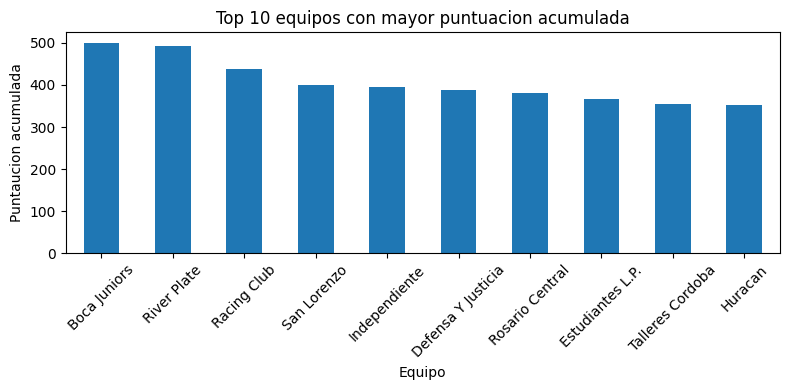

In [ ]:

punt_local_temp = df.groupby(['season', 'Equipo_local'])['puntuacion_total_local'].max().reset_index()
punt_local_temp.columns = ['season', 'equipo', 'puntuacion']

punt_visitante_temp = df.groupby(['season', 'Equipo_visitante'])['puntuacion_total_visitante'].max().reset_index()
punt_visitante_temp.columns = ['season', 'equipo', 'puntuacion']

punt_todas = pd.concat([punt_local_temp, punt_visitante_temp])
punt_max_por_temp = punt_todas.groupby(['season', 'equipo'])['puntuacion'].max().reset_index()
punt_total_acumulada = punt_max_por_temp.groupby('equipo')['puntuacion'].sum().sort_values(ascending=False)
top_10_puntuacion = punt_total_acumulada.head(10)

fig, ax = plt.subplots(figsize=(8, 4))
top_10_puntuacion.plot(kind='bar', ax=ax)
ax.set_title('Top 10 equipos con mayor puntuacion acumulada')
ax.set_xlabel('Equipo')
ax.set_ylabel('Puntaucion acumulada')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Equipo lider por temporada

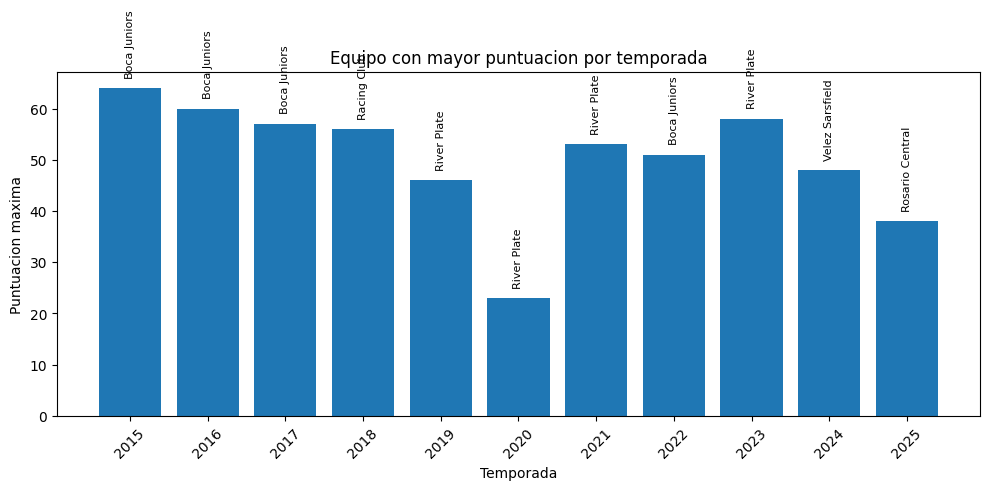

,Temporada,Equipo,Puntuación
0,2015,Boca Juniors,64
1,2016,Boca Juniors,60
2,2017,Boca Juniors,57
3,2018,Racing Club,56
4,2019,River Plate,46
5,2020,River Plate,23
6,2021,River Plate,53
7,2022,Boca Juniors,51
8,2023,River Plate,58
9,2024,Velez Sarsfield,48


In [ ]:
df_lideres = (
    punt_max_por_temp
    .sort_values('puntuacion', ascending=False)
    .groupby('season')
    .first()
    .reset_index()
    .rename(columns={'season': 'Temporada', 'equipo': 'Equipo', 'puntuacion': 'Puntuación'})
)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_lideres['Temporada'].astype(str), df_lideres['Puntuación'])
ax.set_title('Equipo con mayor puntuacion por temporada')
ax.set_xlabel('Temporada')
ax.set_ylabel('Puntuacion maxima')
ax.tick_params(axis='x', rotation=45)
for i, (temp, equipo, punt) in enumerate(zip(df_lideres['Temporada'], df_lideres['Equipo'], df_lideres['Puntuación'])):
    ax.text(i, punt + 2, equipo, ha='center', va='bottom', fontsize=8, rotation=90)
plt.tight_layout()
plt.show()

df_lideres


### Visualizaciones bivariadas

#### Analisis de correlacion entre variables numericas


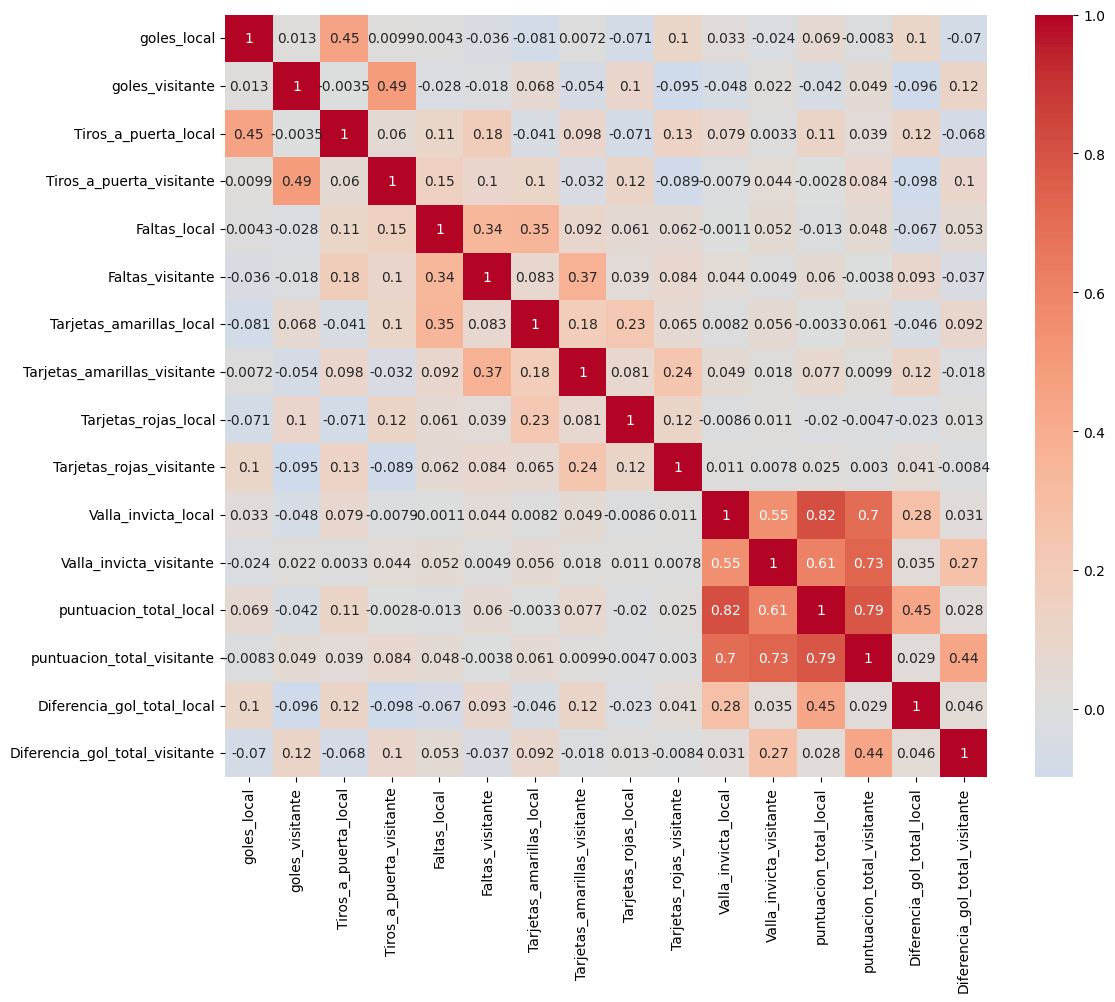

In [ ]:
variables_correlacion = [
      'goles_local'
    , 'goles_visitante'
    , 'Tiros_a_puerta_local'
    , 'Tiros_a_puerta_visitante'
    , 'Faltas_local'
    , 'Faltas_visitante'
    , 'Tarjetas_amarillas_local'
    , 'Tarjetas_amarillas_visitante'
    , 'Tarjetas_rojas_local'
    , 'Tarjetas_rojas_visitante'
    , 'Valla_invicta_local'
    , 'Valla_invicta_visitante'
    , 'puntuacion_total_local'
    , 'puntuacion_total_visitante'
    , 'Diferencia_gol_total_local'
    , 'Diferencia_gol_total_visitante'
]

matriz_correlacion = df[variables_correlacion].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0, square=True, )
plt.tight_layout()
plt.show()

Se pueda ver una gran relacion en lo que es la puntuacion y las vallas invictas. Tiene sentido ya que si te meten menos goles, ganas mas partidos, si ganas mas partidos, ganas mas puntuacion.

Tambien se puede ver una relacion en lo que son faltas con las tarjetas amarillas y faltas. Se puede ver que cuando suele haber mas faltas, suelen haber mas tarjetas amarillas.

Tambien se puede ver una relacion con los tiros a puerta y los goles, y tiene sentido, ya que si pateamos mas al arco, hay mas probabilidades de hacer goles. Los tiros a puerta de visitante con los goles visitantes tienen hasta un 0.5 de correlacion.

En este analisis estaria bueno tambien ver como se relacionan con el resultado del partido, pero no tenemos una columna numerica del resultado, por lo tanto vamos a agregar nuevas columnas ganador_local ganador_visitante y empate al dataframe y sacar la matriz de correlacion devuelta.

In [ ]:
df['ganador_local'] = (df['Resultado'] == 'Ganador local').astype(int)
df['ganador_visitante'] = (df['Resultado'] == 'Ganador visitante').astype(int)
df['empate'] = (df['Resultado'] == 'Empate').astype(int)

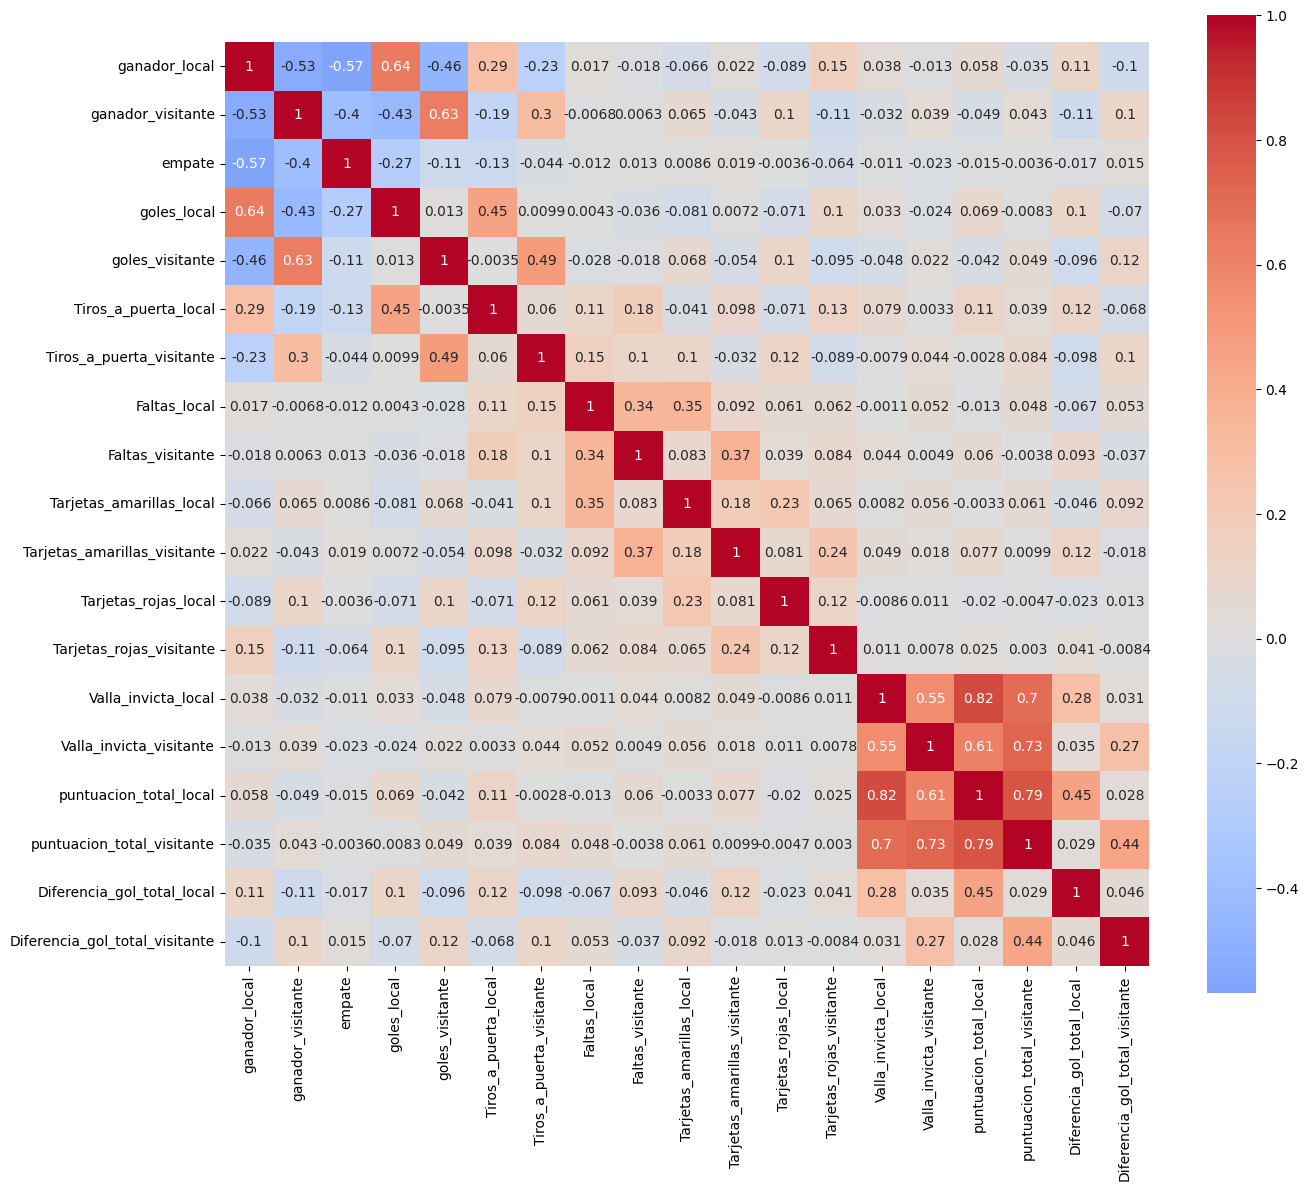

In [ ]:
variables_correlacion = [
     'ganador_local'
    , 'ganador_visitante'
    , 'empate'
    , 'goles_local'
    , 'goles_visitante'
    , 'Tiros_a_puerta_local'
    , 'Tiros_a_puerta_visitante'
    , 'Faltas_local'
    , 'Faltas_visitante'
    , 'Tarjetas_amarillas_local'
    , 'Tarjetas_amarillas_visitante'
    , 'Tarjetas_rojas_local'
    , 'Tarjetas_rojas_visitante'
    , 'Valla_invicta_local'
    , 'Valla_invicta_visitante'
    , 'puntuacion_total_local'
    , 'puntuacion_total_visitante'
    , 'Diferencia_gol_total_local'
    , 'Diferencia_gol_total_visitante'
]

matriz_correlacion = df[variables_correlacion].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0, square=True)
plt.tight_layout()
plt.show()

Ahora con estas nuevas columnas, si se puede ver en la matriz la correlacion que tienen los goles con las victorias.

Analicemos mejor estas relaciones detectadas anteriormente, con un analisis mas granular.

### Relacion entre goles y tiros a puerta

En este caso nos interesa ver la relacion entre goles y tiros a puerta, pero no me interesa local o visitante, queremos analizarlo del punto de vista del partido en si, pero con mas granularidad. Por lo tanto para esto debemos agregados 2 columnas, una que tenga el total de goles del partido y otra los tiro a puerta totales.

In [ ]:
df["Tiros_a_puerta_total"] = df["Tiros_a_puerta_local"] + df["Tiros_a_puerta_visitante"]
df["Goles_total"] = df["goles_local"] + df["goles_visitante"]

Ver la correlacion

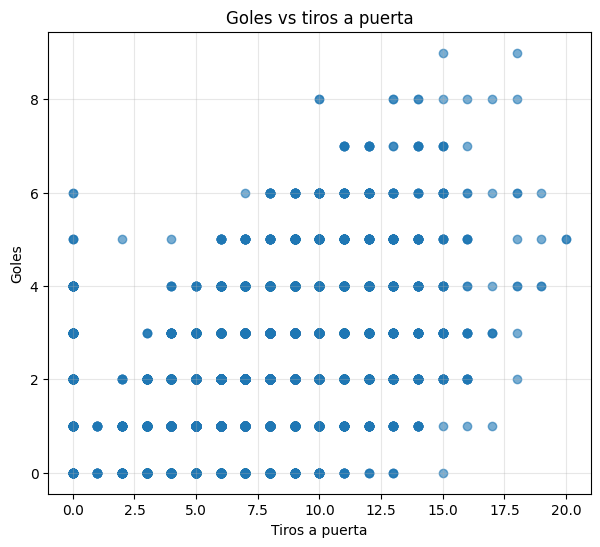

0.45431897610785776


In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(df["Tiros_a_puerta_total"], df["Goles_total"], alpha=0.6)
plt.title("Goles vs tiros a puerta")
plt.xlabel("Tiros a puerta")
plt.ylabel("Goles")
plt.grid(True, alpha=0.3)
plt.show()

corr_goles_vs_tiros = df["Tiros_a_puerta_total"].corr(df["Goles_total"])
print(corr_goles_vs_tiros)

### Relacion entre puntacion y valla invicta

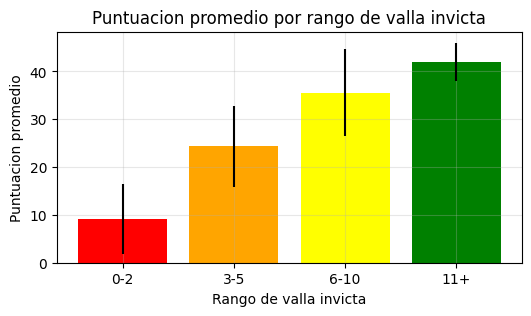

In [ ]:
# Create ranges for 'Valla_invicta_local'
valla_invicta_bins = [-1, 2, 5, 10, df['Valla_invicta_local'].max()]
valla_ranges = ['0-2', '3-5', '6-10', '11+']
df['valla_invicta_rango'] = pd.cut(df['Valla_invicta_local'], bins=valla_invicta_bins, labels=valla_ranges, right=True)

puntuacion_means = []
puntuacion_stds = []

for rango in valla_ranges:
    data = df[df['valla_invicta_rango'] == rango]['puntuacion_total_local']
    puntuacion_means.append(data.mean())
    puntuacion_stds.append(data.std())

plt.figure(figsize=(6,3))
plt.bar(valla_ranges, puntuacion_means, yerr=puntuacion_stds, color=['red', 'orange', 'yellow', 'green'])

plt.title('Puntuacion promedio por rango de valla invicta')
plt.ylabel('Puntuacion promedio')
plt.xlabel('Rango de valla invicta')
plt.grid(True, alpha=0.3)
plt.show()

Relacion entre faltas y tarjetas amarillas

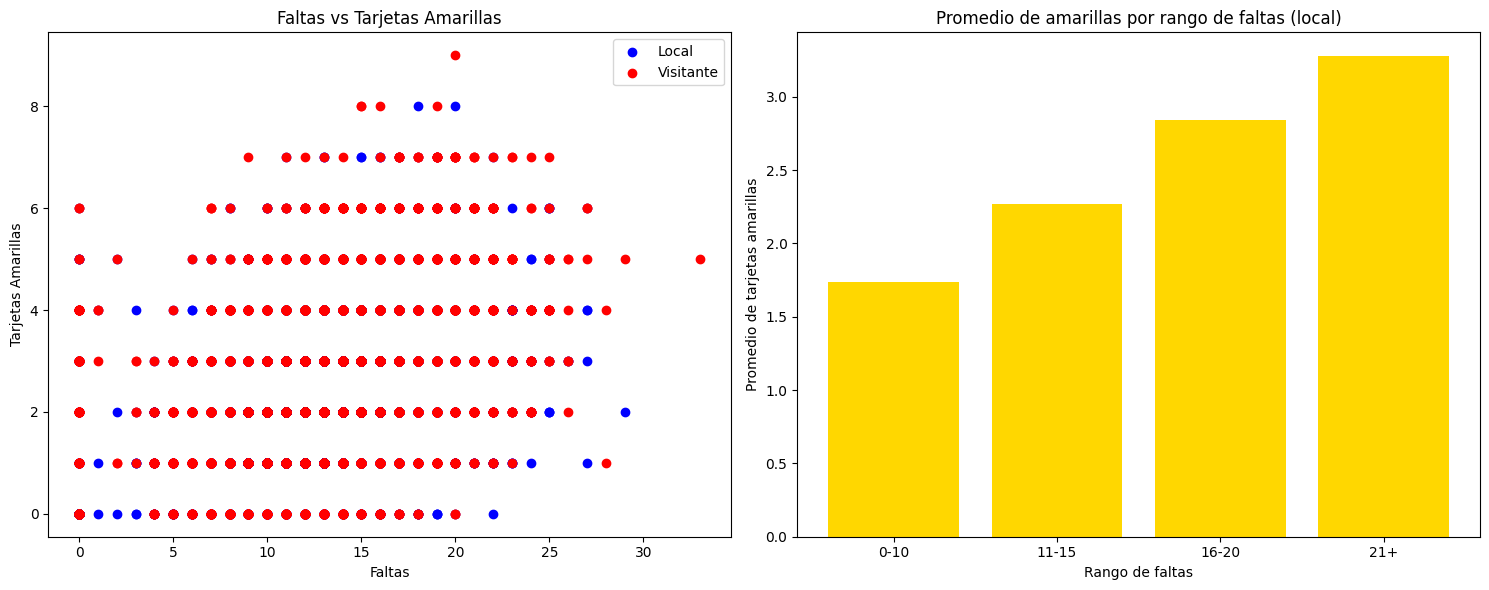

Correlación faltas vs amarillas (local): 0.3505891520744365
Correlación faltas vs amarillas (visitante): 0.3735879058901592


In [ ]:
bins = [0, 10, 15, 20, np.inf]
labels = ['0-10', '11-15', '16-20', '21+']

amarillas_means_local = []
for i in range(len(bins)-1):
    data = df[(df['Faltas_local'] > bins[i]) & (df['Faltas_local'] <= bins[i+1])]
    amarillas_means_local.append(data['Tarjetas_amarillas_local'].mean())

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(df['Faltas_local'], df['Tarjetas_amarillas_local'], color='blue', label='Local')
axes[0].scatter(df['Faltas_visitante'], df['Tarjetas_amarillas_visitante'], color='red', label='Visitante')
axes[0].set_title('Faltas vs Tarjetas Amarillas')
axes[0].set_xlabel('Faltas')
axes[0].set_ylabel('Tarjetas Amarillas')
axes[0].legend()

x = np.arange(len(labels))
axes[1].bar(x, amarillas_means_local, color='gold')
axes[1].set_title('Promedio de amarillas por rango de faltas (local)')
axes[1].set_xlabel('Rango de faltas')
axes[1].set_ylabel('Promedio de tarjetas amarillas')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)

plt.tight_layout()
plt.show()

corr_faltas_amarillas_local = df['Faltas_local'].corr(df['Tarjetas_amarillas_local'])
corr_faltas_amarillas_visitante = df['Faltas_visitante'].corr(df['Tarjetas_amarillas_visitante'])
print("Correlación faltas vs amarillas (local):", corr_faltas_amarillas_local)
print("Correlación faltas vs amarillas (visitante):", corr_faltas_amarillas_visitante)


# Hipotesis

### Hipótesis: Más Tarjetas y Derrotas

**Enunciado:**\
¿Recibir más tarjetas (amarillas o rojas) en un partido correlaciona con perder el partido?

- **Variables:**
    - Número de tarjetas amarillas recibidas por un equipo en un partido.
    - Número de tarjetas rojas recibidas por un equipo en un partido.
    - Resultado del partido para ese equipo (ganador vs perdedor).
- **Justificación:** Las amonestaciones pueden indicar frustración, juego brusco o decisiones tácticas desesperadas, lo que podría estar asociado con un rendimiento deficiente y, en consecuencia, con derrotas. Además, una expulsión (tarjeta roja) deja al equipo con un jugador menos, impactando negativamente sus posibilidades de ganar.

Correlación entre Tarjetas Amarillas y ganar el partido: -0.10
Correlación entre Tarjetas Rojas y ganar el partido: -0.12


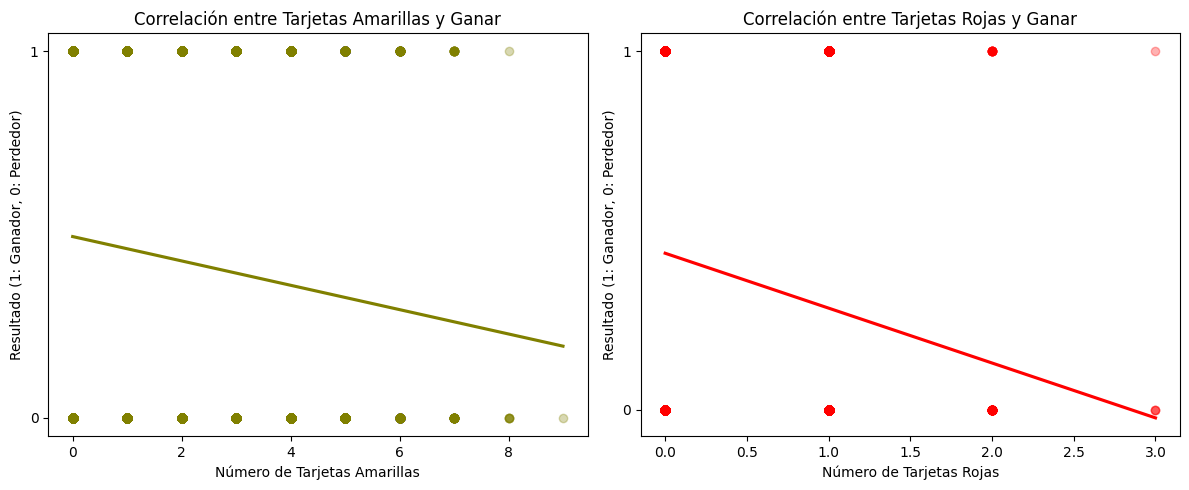

In [ ]:
# Creamos un nuevo DataFrame para analizar tarjetas vs. resultado
df_corr = df[['Tarjetas_amarillas_local', 'Tarjetas_rojas_local', 'Resultado']].copy()

# Para el equipo visitante, necesitamos invertir la perspectiva del resultado
df_visitante = df[['Tarjetas_amarillas_visitante', 'Tarjetas_rojas_visitante', 'Resultado']].copy()
df_visitante.columns = ['Tarjetas_amarillas', 'Tarjetas_rojas', 'Resultado']

# Invertimos el resultado para el equipo visitante: 'Ganador visitante' se convierte en 'Perdedor', 'Ganador local' se convierte en 'Perdedor', 'Empate' sigue siendo 'Empate'
df_visitante['Resultado'] = df_visitante['Resultado'].apply(lambda x: 'Perdedor' if x != 'Ganador visitante' else 'Ganador')

# Renombramos las columnas para el equipo local para que coincidan con el equipo visitante para la concatenación
df_corr.columns = ['Tarjetas_amarillas', 'Tarjetas_rojas', 'Resultado']

# Para el equipo local: 'Ganador local' se convierte en 'Ganador', 'Ganador visitante' se convierte en 'Perdedor', 'Empate' sigue siendo 'Empate'
df_corr['Resultado'] = df_corr['Resultado'].apply(lambda x: 'Ganador' if x == 'Ganador local' else ('Perdedor' if x == 'Ganador visitante' else 'Empate'))


# Concatenamos los dataframes local y visitante
df_corr = pd.concat([df_corr, df_visitante])

# Filtramos los empates para el análisis de correlación
df_corr = df_corr[df_corr['Resultado'] != 'Empate'].copy()

# Convertimos 'Resultado' a numérico: 1 para 'Ganador', 0 para 'Perdedor'
df_corr['gano'] = (df_corr['Resultado'] == 'Ganador').astype(int)

# Calculamos la correlación
corr_amarillas_ganar = df_corr['Tarjetas_amarillas'].corr(df_corr['gano'])
corr_rojas_ganar = df_corr['Tarjetas_rojas'].corr(df_corr['gano'])

print(f"Correlación entre Tarjetas Amarillas y ganar el partido: {corr_amarillas_ganar:.2f}")
print(f"Correlación entre Tarjetas Rojas y ganar el partido: {corr_rojas_ganar:.2f}")


# Graficamos scatter plots con líneas de regresión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(x='Tarjetas_amarillas', y='gano', data=df_corr, ax=axes[0], logistic=False, ci=None, scatter_kws={'alpha':0.3}, color='olive')
axes[0].set_title('Correlación entre Tarjetas Amarillas y Ganar')
axes[0].set_xlabel('Número de Tarjetas Amarillas')
axes[0].set_ylabel('Resultado (1: Ganador, 0: Perdedor)')
axes[0].set_yticks([0, 1])

sns.regplot(x='Tarjetas_rojas', y='gano', data=df_corr, ax=axes[1], logistic=False, ci=None, scatter_kws={'alpha':0.3}, color='red')
axes[1].set_title('Correlación entre Tarjetas Rojas y Ganar')
axes[1].set_xlabel('Número de Tarjetas Rojas')
axes[1].set_ylabel('Resultado (1: Ganador, 0: Perdedor)')
axes[1].set_yticks([0, 1])

plt.tight_layout()
plt.show()

#### Resultado y Análisis

Los resultados de la correlación muestran una **correlación negativa débil** (no se confirma) entre el número de tarjetas recibidas (tanto amarillas como rojas) y ganar el partido.

*   **Tarjetas Amarillas:** La correlación de -0.10 indica que, en promedio, los equipos que reciben más tarjetas amarillas tienden a tener una menor probabilidad de ganar el partido. Sin embargo, la correlación es bastante baja, lo que sugiere que, si bien existe una relación, las tarjetas amarillas por sí solas no son un predictor fuerte del resultado del partido.

*   **Tarjetas Rojas:** La correlación de -0.12 es ligeramente más fuerte que la de las tarjetas amarillas, pero aún así se considera débil. Esto sugiere que recibir una tarjeta roja tiene un impacto ligeramente mayor en la disminución de la probabilidad de ganar el partido, lo cual tiene sentido ya que una expulsión afecta directamente la cantidad de jugadores en el campo.

En conclusión, si bien existe una ligera tendencia a que un mayor número de tarjetas se asocie con la derrota, esta relación no es muy fuerte. Otros factores en el partido probablemente tienen un impacto mucho mayor en el resultado final que el número de tarjetas recibidas.

### Hipotesis: Los equipos cuando juegan de local tienden a realizar mas goles que cuando juegan de visitante

**Enunciado:**
Los equipos, en promedio, tienden a marcar más goles cuando juegan en condición de local que cuando juegan como visitantes.

- **Variable objetivo:** Promedio de goles marcados por partido
- **Variable independiente:** Condición de juego (local vs visitante)
- **Justificación:** Se espera que la localía (apoyo del público, familiaridad con el campo, menos viajes) influya positivamente en la capacidad ofensiva de los equipos.

Media de goles por condición:
   Condicion  Media_Goles
0      Local        1.264
1  Visitante        0.978


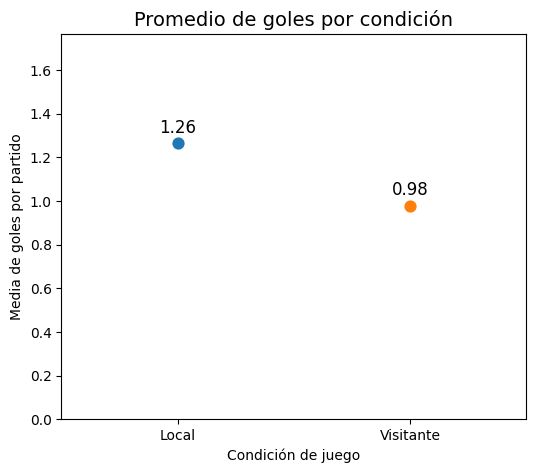

In [ ]:
medias_goles = pd.DataFrame({
    "Condicion": ["Local", "Visitante"],
    "Media_Goles": [df["goles_local"].mean(), df["goles_visitante"].mean()]
})

print("Media de goles por condición:")
print(medias_goles)

# Usando un point plot con intervalos de confianza
plt.figure(figsize=(6,5))
ax = sns.pointplot(data=medias_goles, x="Condicion", y="Media_Goles", hue="Condicion", legend=False, errorbar='ci')

for i, v in enumerate(medias_goles["Media_Goles"]):
    ax.text(i, v + 0.05, f"{v:.2f}", ha="center", fontsize=12)

plt.title("Promedio de goles por condición", fontsize=14)
plt.ylabel("Media de goles por partido")
plt.xlabel("Condición de juego")
plt.ylim(0, max(medias_goles["Media_Goles"]) + 0.5)
plt.show()

#### Resultado y Análisis

Se confirma la Hipótesis. Observamos que el promedio de goles marcados por los equipos locales (aproximadamente 1.26) es consistentemente mayor que el promedio de goles marcados por los equipos visitantes (aproximadamente 0.98). Esta diferencia de alrededor del 28% sugiere una ventaja ofensiva significativa al jugar en casa. El gráfico de puntos visualiza esta diferencia y la superposición limitada de los intervalos sugiere que es probable que esta diferencia no sea debida al azar.

Esta ventaja puede atribuirse a varios factores asociados con la localía:

*   **Apoyo del público:** La energía y el aliento de los aficionados locales pueden motivar al equipo y ejercer presión sobre el equipo visitante y los árbitros.
*   **Familiaridad con el campo:** Los equipos locales están acostumbrados a las dimensiones, el césped y otras características específicas de su estadio.
*   **Menos fatiga por viajes:** Los equipos locales evitan el desgaste físico y mental asociado con los viajes.
*   **Factores psicológicos:** Jugar en casa puede generar una mayor confianza y seguridad en los jugadores.

La diferencia observada en el promedio de goles marcados respalda la idea de que la localía es un factor importante que influye en el rendimiento ofensivo de los equipos.


## Hipótesis: Forma Reciente y Victorias de Visitante (Excluyendo 5 Grandes)

**Enunciado:**  
Quitando a los 5 grandes (River Plate, Boca Juniors, San Lorenzo, Racing Club, Independiente), los equipos que tienen una forma reciente positiva tienen más chance de ganar de visitante.

- **Variable objetivo:** Forma reciente del equipo visitante (positiva vs negativa)  
- **Variable independiente:** Resultado del partido (ganador visitante o no)  
- **Justificación:** La forma reciente indica el momentum del equipo, lo que puede influir en el rendimiento fuera de casa.

Probabilidad de Victoria Visitante por Forma Reciente:
                     Probabilidad  Victorias  Total_Partidos
clasificacion_forma                                         
Excelente                  34.910         37             106
Buena                      25.820        173             670
Regular                    25.800        308            1194
Mala                       22.930         94             410

Total de victorias visitantes: 612 de 2380 partidos


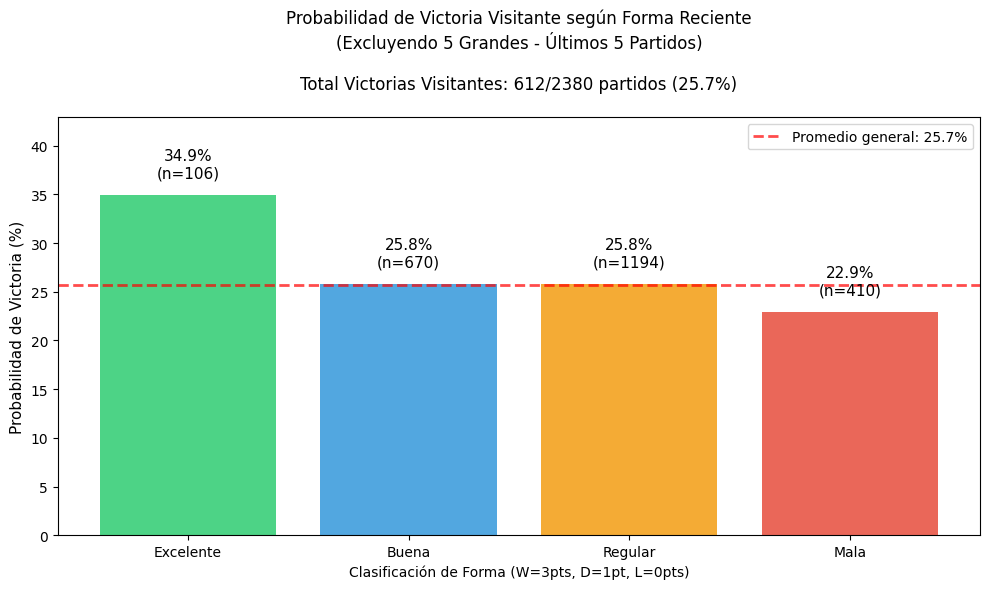

In [ ]:
# Excluir los 5 grandes
cinco_grandes = ['River Plate', 'Boca Juniors', 'Racing Club', 'San Lorenzo', 'Independiente']
df_filtrado = df[~df['Equipo_local'].isin(cinco_grandes) & ~df['Equipo_visitante'].isin(cinco_grandes)].copy()

# Función para clasificar forma reciente (últimos 5 partidos)
def clasificar_forma(forma_str):
    if pd.isna(forma_str) or forma_str == '' or len(forma_str) < 3:
        return 'Sin datos'

    forma_reciente = forma_str[-5:] if len(forma_str) >= 5 else forma_str

    puntos = sum(3 if r == 'W' else 1 if r == 'D' else 0 for r in forma_reciente)

    if puntos >= 12:
        return 'Excelente'
    elif puntos >= 8:
        return 'Buena'
    elif puntos >= 4:
        return 'Regular'
    else:
        return 'Mala'

# Aplicar clasificación a todos los partidos visitantes
df_filtrado['clasificacion_forma'] = df_filtrado['Forma_visitante'].apply(clasificar_forma)
df_filtrado = df_filtrado[df_filtrado['clasificacion_forma'] != 'Sin datos'].copy()
df_filtrado['victoria_visitante'] = (df_filtrado['Resultado'] == 'Ganador visitante').astype(int)
# Calcular total de victorias visitantes
total_victorias_visitante = df_filtrado['victoria_visitante'].sum()
total_partidos_analizados = len(df_filtrado)

# Calcular probabilidad de victoria por forma
prob_victoria_por_forma = df_filtrado.groupby('clasificacion_forma').agg({
    'victoria_visitante': ['mean', 'sum'],
    'fixture_id': 'count'
}).round(4)
prob_victoria_por_forma.columns = ['Probabilidad', 'Victorias', 'Total_Partidos']
prob_victoria_por_forma['Probabilidad'] *= 100

# Ordenar categorías
orden_forma = ['Excelente', 'Buena', 'Regular', 'Mala']
prob_victoria_por_forma = prob_victoria_por_forma.reindex(orden_forma)

print("Probabilidad de Victoria Visitante por Forma Reciente:")
print(prob_victoria_por_forma)
print(f"\nTotal de victorias visitantes: {int(total_victorias_visitante)} de {total_partidos_analizados} partidos")

# Probabilidad de victoria por forma
colores = {'Excelente': '#2ecc71', 'Buena': '#3498db', 'Regular': '#f39c12', 'Mala': '#e74c3c'}

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(
    prob_victoria_por_forma.index,
    prob_victoria_por_forma['Probabilidad'],
    color=[colores[cat] for cat in prob_victoria_por_forma.index],
    alpha=0.85
)

# Añadir valores sobre las barras
for i, (idx, row) in enumerate(prob_victoria_por_forma.iterrows()):
    ax.text(
        i,
        row['Probabilidad'] + 1.5,
        f"{row['Probabilidad']:.1f}%\n(n={int(row['Total_Partidos'])})",
        ha='center',
        va='bottom',
        fontsize=11
    )

# Título con total de victorias visitantes
ax.set_title(f'Probabilidad de Victoria Visitante según Forma Reciente\n(Excluyendo 5 Grandes - Últimos 5 Partidos)\n \nTotal Victorias Visitantes: {int(total_victorias_visitante)}/{total_partidos_analizados} partidos ({total_victorias_visitante/total_partidos_analizados*100:.1f}%)',
             pad=20, fontsize=12)
ax.set_xlabel('Clasificación de Forma (W=3pts, D=1pt, L=0pts)')
ax.set_ylabel('Probabilidad de Victoria (%)', fontsize=11)
ax.set_ylim(0, max(prob_victoria_por_forma['Probabilidad']) + 8)

# Añadir línea de referencia (promedio general)
promedio_general = df_filtrado['victoria_visitante'].mean() * 100
ax.axhline(y=promedio_general, color='red', linestyle='--', linewidth=2, alpha=0.7,
           label=f'Promedio general: {promedio_general:.1f}%')
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

#### Resultado y Análisis (Excluyendo 5 Grandes)

La hipótesis se **CONFIRMA** con matices. Al excluir a los "5 Grandes", observamos lo siguiente:

*   **Excelente Forma (34.91% victorias visitantes):** Los equipos con una forma reciente excelente tienen la mayor probabilidad de ganar de visitante. Esto sugiere que un gran momento del equipo se traslada positivamente al rendimiento fuera de casa, incluso sin ser uno de los equipos tradicionalmente dominantes.
*   **Buena Forma (25.82% victorias visitantes):** Los equipos con buena forma también muestran una probabilidad de victoria visitante superior al promedio general.
*   **Forma Regular (25.80% victorias visitantes):** La probabilidad de victoria es similar a la de buena forma y cercana al promedio general, indicando que una forma neutral no es una desventaja significativa.
*   **Mala Forma (22.93% victorias visitantes):** Como se esperaba, los equipos con mala forma reciente tienen la menor probabilidad de ganar de visitante.

**Conclusión:** La forma reciente sí parece tener un impacto en la probabilidad de victoria visitante para los equipos fuera de los "5 Grandes". Un equipo en un excelente momento tiene una ventaja notable al jugar fuera de casa, mientras que una mala racha se asocia con una menor probabilidad de éxito como visitante. Si bien la diferencia entre "Buena", "Regular" y "Mala" forma no es tan drástica, la categoría "Excelente" destaca con una probabilidad significativamente mayor de ganar de visitante.

Ahora queremos ver si incluyendo a los equipos grandes, el porcentaje de victoria como visitante sube. Analicemos.

## Hipótesis: Forma Reciente y Victorias de Visitante (incluyendo equipos grandes)

**Enunciado:**  
Los equipos que tienen una forma reciente positiva tienen más chance de ganar de visitante.

- **Variable objetivo:** Forma reciente del equipo visitante (positiva vs negativa)  
- **Variable independiente:** Resultado del partido (ganador visitante o no)  
- **Justificación:** La forma reciente indica el momentum del equipo, lo que puede influir en el rendimiento fuera de casa.

Probabilidad de Victoria Visitante por Forma Reciente (TODOS LOS EQUIPOS):
                     Probabilidad  Victorias  Total_Partidos
clasificacion_forma                                         
Excelente                  39.300        101             257
Buena                      27.940        304            1088
Regular                    26.340        446            1693
Mala                       21.580        115             533

Total de victorias visitantes: 966 de 3571 partidos


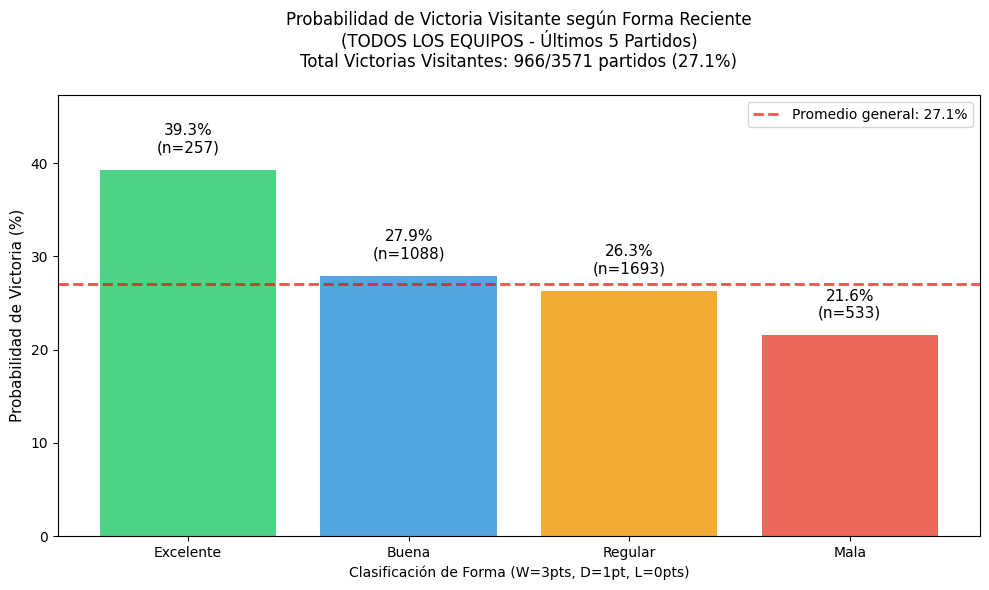

In [ ]:
df_filtrado = df.copy()

# Función para clasificar forma reciente (últimos 5 partidos)
def clasificar_forma(forma_str):
    if pd.isna(forma_str) or forma_str == '' or len(forma_str) < 3:
        return 'Sin datos'

    forma_reciente = forma_str[-5:] if len(forma_str) >= 5 else forma_str

    puntos = sum(3 if r == 'W' else 1 if r == 'D' else 0 for r in forma_reciente)

    if puntos >= 12:
        return 'Excelente'
    elif puntos >= 8:
        return 'Buena'
    elif puntos >= 4:
        return 'Regular'
    else:
        return 'Mala'

# Aplicar clasificación a todos los partidos visitantes
df_filtrado['clasificacion_forma'] = df_filtrado['Forma_visitante'].apply(clasificar_forma)
df_filtrado = df_filtrado[df_filtrado['clasificacion_forma'] != 'Sin datos'].copy()
df_filtrado['victoria_visitante'] = (df_filtrado['Resultado'] == 'Ganador visitante').astype(int)

# Calcular total de victorias visitantes
total_victorias_visitante = df_filtrado['victoria_visitante'].sum()
total_partidos_analizados = len(df_filtrado)

# Calcular probabilidad de victoria por forma
prob_victoria_por_forma = df_filtrado.groupby('clasificacion_forma').agg({
    'victoria_visitante': ['mean', 'sum'],
    'fixture_id': 'count'
}).round(4)
prob_victoria_por_forma.columns = ['Probabilidad', 'Victorias', 'Total_Partidos']
prob_victoria_por_forma['Probabilidad'] *= 100

# Ordenar categorías
orden_forma = ['Excelente', 'Buena', 'Regular', 'Mala']
prob_victoria_por_forma = prob_victoria_por_forma.reindex(orden_forma)

print("Probabilidad de Victoria Visitante por Forma Reciente (TODOS LOS EQUIPOS):")
print(prob_victoria_por_forma)
print(f"\nTotal de victorias visitantes: {int(total_victorias_visitante)} de {total_partidos_analizados} partidos")

# Probabilidad de victoria por forma
colores = {'Excelente': '#2ecc71', 'Buena': '#3498db', 'Regular': '#f39c12', 'Mala': '#e74c3c'}

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(
    prob_victoria_por_forma.index,
    prob_victoria_por_forma['Probabilidad'],
    color=[colores[cat] for cat in prob_victoria_por_forma.index],
    alpha=0.85
)

# Añadir valores sobre las barras
for i, (idx, row) in enumerate(prob_victoria_por_forma.iterrows()):
    ax.text(
        i,
        row['Probabilidad'] + 1.5,
        f"{row['Probabilidad']:.1f}%\n(n={int(row['Total_Partidos'])})",
        ha='center',
        va='bottom',
        fontsize=11
    )

# Título con total de victorias visitantes
ax.set_title(f'Probabilidad de Victoria Visitante según Forma Reciente\n(TODOS LOS EQUIPOS - Últimos 5 Partidos)\nTotal Victorias Visitantes: {int(total_victorias_visitante)}/{total_partidos_analizados} partidos ({total_victorias_visitante/total_partidos_analizados*100:.1f}%)',
             pad=20, fontsize=12)
ax.set_xlabel('Clasificación de Forma (W=3pts, D=1pt, L=0pts)')
ax.set_ylabel('Probabilidad de Victoria (%)', fontsize=11)
ax.set_ylim(0, max(prob_victoria_por_forma['Probabilidad']) + 8)

# Añadir línea de referencia (promedio general)
promedio_general = df_filtrado['victoria_visitante'].mean() * 100
ax.axhline(y=promedio_general, color='red', linestyle='--', linewidth=2, alpha=0.7,
           label=f'Promedio general: {promedio_general:.1f}%')
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

#### Resultado y Análisis (Incluyendo 5 Grandes)

La hipótesis se **CONFIRMA** incluso al incluir a los "5 Grandes", aunque la diferencia entre categorías es un poco menos marcada que al excluirlos, excepto para la forma "Excelente". Observamos lo siguiente:

*   **Excelente Forma (39.30% victorias visitantes):** Al igual que en el análisis anterior, los equipos con forma excelente siguen teniendo la mayor probabilidad de ganar de visitante, y este porcentaje aumenta ligeramente al incluir a los grandes. Esto sugiere que cuando un equipo, grande o no, está en un pico de rendimiento, tiene una capacidad notable para ganar fuera de casa.
*   **Buena Forma (27.94% victorias visitantes):** La probabilidad de victoria visitante para los equipos con buena forma es superior al promedio general.
*   **Forma Regular (26.34% victorias visitantes):** La probabilidad se mantiene cercana al promedio general.
*   **Mala Forma (21.58% victorias visitantes):** Los equipos con mala forma tienen la menor probabilidad de ganar de visitante.

**Conclusión:** La forma reciente es un factor relevante para predecir la probabilidad de victoria visitante. Estar en una racha excelente aumenta significativamente las posibilidades de ganar fuera de casa, mientras que una mala racha las disminuye. Aunque los "5 Grandes" puedan tener una ventaja inherente en general, la forma reciente sigue siendo un indicador importante del desempeño potencial de un equipo como visitante, tanto para grandes como para el resto.

Ahora queremos saber un poco mas en detalle que tan mayor es la ventaja de localia cuando el equipo es grande, comparado con los demas equipos.

## Hipótesis: Ventaja de Localía en Equipos Grandes comparada con el resto de equipos

**Enunciado:**  
En los equipos grandes (River Plate, Boca Juniors, San Lorenzo, Racing Club, Independiente), la ventaja de jugar de local es significativa respecto al resto de los equipos.

- **Variable objetivo:** Equipo local (5 grandes vs resto)  
- **Variable independiente:** Resultado del partido (ganador local o no)  
- **Justificación:** Los equipos grandes tienen mayor capacidad de espectadores y recursos sobre el resto de los equipos

Top 15 equipos por victorias totales:
1. Boca Juniors
2. River Plate
3. Racing Club
4. Banfield
5. Estudiantes L.P.
6. Independiente
7. Rosario Central
8. San Lorenzo
9. Talleres Cordoba
10. Defensa Y Justicia
11. Godoy Cruz
12. Newells Old Boys
13. Atletico Tucuman
14. Colon Santa Fe
15. Huracan

Estadísticas generales de victorias locales por categoría:
              categoria  victorias  total_partidos  porcentaje
0             5 Grandes        410             756      54.233
1                 Resto        732            1915      38.225
2  Top 15 (sin grandes)        626            1435      43.624


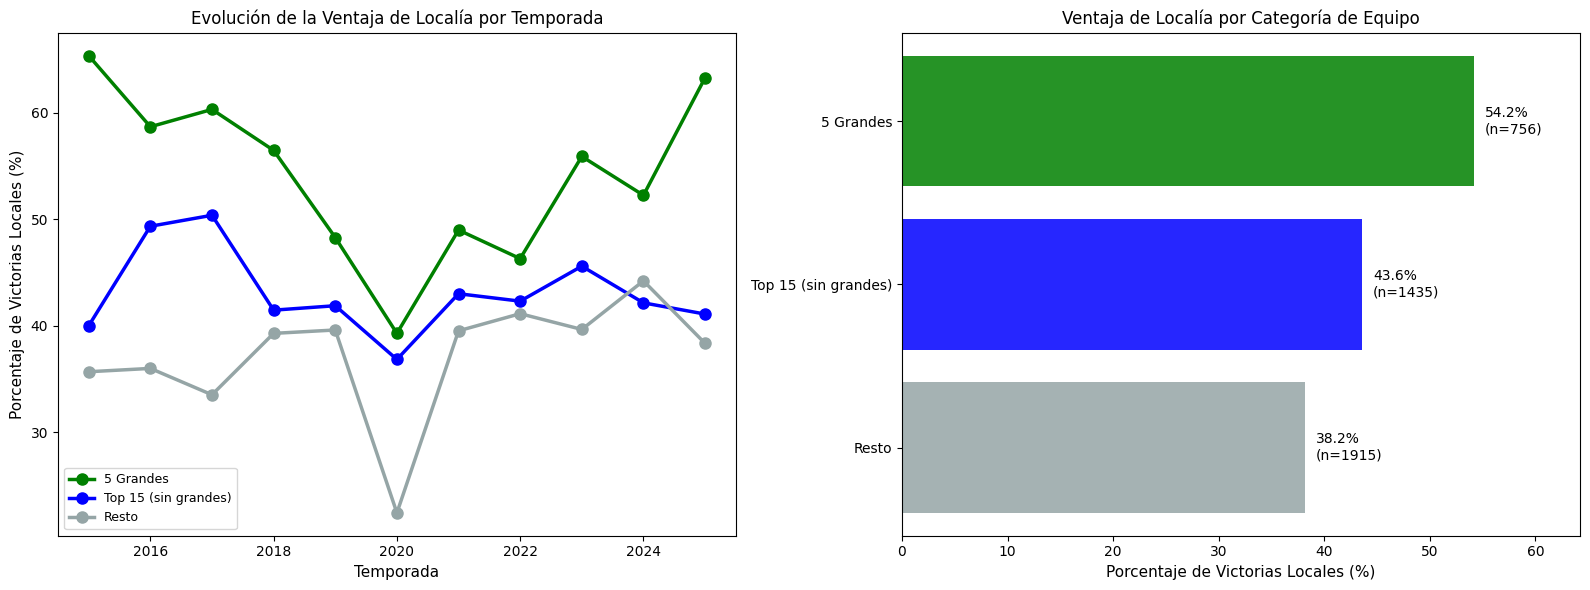

In [ ]:
cinco_grandes = ['River Plate', 'Boca Juniors', 'Racing Club', 'San Lorenzo', 'Independiente']

victorias_por_equipo = pd.concat([
    df.groupby('Equipo_local').agg({'Victorias_local_en_casa': 'max'}),
    df.groupby('Equipo_visitante').agg({'Victorias_visitante_fuera': 'max'})
], axis=1).fillna(0)
victorias_por_equipo['Total_Victorias'] = victorias_por_equipo['Victorias_local_en_casa'] + victorias_por_equipo['Victorias_visitante_fuera']
top_15_equipos = victorias_por_equipo.nlargest(15, 'Total_Victorias').index.tolist()

print("Top 15 equipos por victorias totales:")
for i, equipo in enumerate(top_15_equipos, 1):
    print(f"{i}. {equipo}")

def clasificar_equipo(nombre_equipo):
    if nombre_equipo in cinco_grandes:
        return '5 Grandes'
    elif nombre_equipo in top_15_equipos:
        return 'Top 15 (sin grandes)'
    else:
        return 'Resto'

df['categoria_local'] = df['Equipo_local'].apply(clasificar_equipo)
df['victoria_local'] = (df['Resultado'] == 'Ganador local').astype(int)

stats_por_categoria_temporada = df.groupby(['season', 'categoria_local']).agg({
    'victoria_local': ['sum', 'count', 'mean']
}).reset_index()
stats_por_categoria_temporada.columns = ['season', 'categoria', 'victorias', 'total_partidos', 'porcentaje']
stats_por_categoria_temporada['porcentaje'] *= 100

stats_generales = df.groupby('categoria_local').agg({
    'victoria_local': ['sum', 'count', 'mean']
}).reset_index()
stats_generales.columns = ['categoria', 'victorias', 'total_partidos', 'porcentaje']
stats_generales['porcentaje'] *= 100

print("\nEstadísticas generales de victorias locales por categoría:")
print(stats_generales)

colores_categoria = {'5 Grandes': 'green', 'Top 15 (sin grandes)': 'blue', 'Resto': '#95a5a6'}
orden_categorias = ['5 Grandes', 'Top 15 (sin grandes)', 'Resto']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for categoria in orden_categorias:
    data_cat = stats_por_categoria_temporada[stats_por_categoria_temporada['categoria'] == categoria]
    axes[0].plot(data_cat['season'], data_cat['porcentaje'],
             marker='o', linewidth=2.5, markersize=8,
             label=categoria, color=colores_categoria[categoria])
axes[0].set_xlabel('Temporada', fontsize=11)
axes[0].set_ylabel('Porcentaje de Victorias Locales (%)', fontsize=11)
axes[0].set_title('Evolución de la Ventaja de Localía por Temporada', fontsize=12)
axes[0].legend(loc='best', fontsize=9)

stats_generales_ordenadas = stats_generales.set_index('categoria').reindex(orden_categorias)
bars = axes[1].barh(
    stats_generales_ordenadas.index[::-1],
    stats_generales_ordenadas['porcentaje'][::-1],
    color=[colores_categoria[cat] for cat in stats_generales_ordenadas.index[::-1]],
    alpha=0.85
)
for i, (idx, row) in enumerate(stats_generales_ordenadas[::-1].iterrows()):
    axes[1].text(row['porcentaje'] + 1, i,
             f"{row['porcentaje']:.1f}%\n(n={int(row['total_partidos'])})",
             va='center', fontsize=10)
axes[1].set_xlabel('Porcentaje de Victorias Locales (%)', fontsize=11)
axes[1].set_title('Ventaja de Localía por Categoría de Equipo', fontsize=12)
axes[1].set_xlim(0, max(stats_generales_ordenadas['porcentaje']) + 10)

plt.tight_layout()
plt.show()

#### Resultado y Análisis

La hipótesis se **CONFIRMA**. Existe una ventaja de localía significativa para los "5 Grandes" en comparación con los demás equipos.

*   **"5 Grandes":** Tienen el porcentaje más alto de victorias como local, con un promedio del **54.2%**. Esto es considerablemente superior al de las otras categorías.
*   **"Top 15 (sin grandes)":** Estos equipos, que se encuentran entre los 15 con más victorias totales pero no son parte de los "5 Grandes", tienen un porcentaje de victorias locales del **43.6%**. Si bien es mayor que el del "Resto", es notablemente inferior al de los "5 Grandes".
*   **"Resto":** El resto de los equipos tienen el porcentaje más bajo de victorias locales, con un **38.2%**.

La diferencia de casi 16 puntos porcentuales en la probabilidad de ganar de local entre los "5 Grandes" y el "Resto" es una clara indicación de la ventaja que tienen estos equipos al jugar en casa. Esta diferencia se mantiene relativamente constante a lo largo de las temporadas, como se observa en el gráfico de evolución.

Esta ventaja superior en la localía para los equipos grandes puede deberse a una combinación de factores, incluyendo:

*   **Mayor base de aficionados:** Estadios más grandes y llenos generan un ambiente más intimidante para los visitantes.
*   **Mayor calidad de plantilla:** Equipos con mejores jugadores tienen más probabilidades de capitalizar la ventaja de jugar en casa.
*   **Historia y prestigio:** Jugar en estadios históricos contra equipos con una rica tradición puede afectar psicológicamente a los equipos visitantes.

En conclusión, los "5 Grandes" argentinos demuestran una ventaja de localía significativamente mayor que el resto de los equipos, lo que respalda la hipótesis planteada.

#### Feature engineering para el modelado

A partir del análisis exploratorio realizado, nos dimos cuenta de que convenía transformar y eliminar algunas columnas que teníamos para dejar el dataset listo para la etapa de entrenamiento.

Se reutiliza el pipeline ya validado para generar las variables necesarias antes del entrenamiento, partiendo del dataset original.

# Feature engineering para predicción de partidos

Este notebook toma el dataset original de partidos y calcula variables históricas normalizadas por equipo y rol (local/visitante) para entrenar modelos de predicción.

## Flujo general
- Cargar el dataset original (4106 partidos).
- Procesar cada temporada/subtemporada en orden cronológico.
- Calcular métricas acumuladas previas al partido (sin incluir el partido actual).
- Normalizar tasas y promedios usando min-max entre equipos para la fecha actual.
- Exportar un nuevo CSV con todas las características listas para modelado.

In [ ]:
import math
from collections import defaultdict, deque

import pandas as pd

pd.options.display.float_format = '{:,.3f}'.format

In [ ]:
DATA_PATH = 'liga_argentina_csv_final.csv'

df_raw = pd.read_csv(DATA_PATH, sep=None, engine='python')
print(f'Partidos cargados: {df_raw.shape[0]}')
df_raw.head()

Partidos cargados: 4106


,season,sub_season,fixture_id,fecha_del_partido,round,Equipo_local_id,Equipo_local,Equipo_visitante_id,Equipo_visitante,goles_local,...,Promedio_Goles_recibidos_local_en_casa,Promedio_Goles_recibidos_visitante_fuera,Valla_invicta_local,Valla_invicta_visitante,Forma_local,Forma_visitante,Diferencia_gol_total_local,Diferencia_gol_total_visitante,puntuacion_total_local,puntuacion_total_visitante
0,2015,1,187843,2015-02-13 21:00:00+00:00,Regular Season - 1,438,Velez Sarsfield,463,Aldosivi,2,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0
1,2015,1,187844,2015-02-14 00:10:00+00:00,Regular Season - 1,436,Racing Club,437,Rosario Central,0,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0
2,2015,1,187846,2015-02-14 20:00:00+00:00,Regular Season - 1,434,Gimnasia L.P.,442,Defensa Y Justicia,0,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0
3,2015,1,187845,2015-02-14 20:00:00+00:00,Regular Season - 1,460,San Lorenzo,448,Colon Santa Fe,2,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0
4,2015,1,187847,2015-02-14 22:15:00+00:00,Regular Season - 1,439,Godoy Cruz,461,San Martin S.J.,1,...,0.000,0.000,0,0,NaN,NaN,0,0,0,0


## Definición de funciones auxiliares
La función `compute_team_features` aplica todo el pipeline de cálculo y devuelve un dataframe enriquecido.

In [ ]:
FEATURE_COLUMNS = [
    'Partidos_jugados_local_previos',
    'Partidos_jugados_visitante_previos',
    'Victorias_local_en_casa_tasa_normalizada',
    'Victorias_visitante_fuera_tasa_normalizada',
    'Empates_local_en_casa_tasa_normalizada',
    'Empates_visitante_fuera_tasa_normalizada',
    'Derrotas_local_en_casa_tasa_normalizada',
    'Derrotas_visitante_fuera_tasa_normalizada',
    'Promedio_Goles_marcados_totales_local_normalizado',
    'Promedio_Goles_marcados_totales_visitante_normalizado',
    'Promedio_Goles_recibidos_totales_local_normalizado',
    'Promedio_Goles_recibidos_totales_visitante_normalizado',
    'Promedio_Goles_marcados_local_en_casa_normalizado',
    'Promedio_Goles_marcados_visitante_fuera_normalizado',
    'Promedio_Goles_recibidos_local_en_casa_normalizado',
    'Promedio_Goles_recibidos_visitante_fuera_normalizado',
    'Valla_invicta_local_tasa_normalizada',
    'Valla_invicta_visitante_tasa_normalizada',
    'Forma_local_ultimos5',
    'Forma_visitante_ultimos5',
    'Forma_local_puntos_ultimos5',
    'Forma_visitante_puntos_ultimos5',
    'Promedio_Diferencia_gol_total_local_normalizado',
    'Promedio_Diferencia_gol_total_visitante_normalizado',
    'Promedio_Puntuacion_total_local',
    'Promedio_Puntuacion_total_visitante',
    'Promedio_Puntuacion_total_local_normalizado',
    'Promedio_Puntuacion_total_visitante_normalizado'
]


ORIGINAL_COLUMNS_TO_REMOVE = [
    'goles_local',
    'goles_visitante',
    'Tiros_a_puerta_local',
    'Tiros_a_puerta_visitante',
    'Faltas_local',
    'Faltas_visitante',
    'Tarjetas_amarillas_local',
    'Tarjetas_amarillas_visitante',
    'Tarjetas_rojas_local',
    'Tarjetas_rojas_visitante',
    'Partidos_jugados_local',
    'Partidos_jugados_visitante',
    'Victorias_local_en_casa',
    'Victorias_visitante_fuera',
    'Empates_local_en_casa',
    'Empates_visitante_fuera',
    'Derrotas_local_en_casa',
    'Derrotas_visitante_fuera',
    'Goles_marcados_totales_local',
    'Goles_marcados_totales_visitante',
    'Goles_recibidos_totales_local',
    'Goles_recibidos_totales_visitante',
    'Promedio_Goles_marcados_local_en_casa',
    'Promedio_Goles_marcados_visitante_fuera',
    'Promedio_Goles_recibidos_local_en_casa',
    'Promedio_Goles_recibidos_visitante_fuera',
    'Valla_invicta_local',
    'Valla_invicta_visitante',
    'Forma_local',
    'Forma_visitante',
    'Diferencia_gol_total_local',
    'Diferencia_gol_total_visitante',
    'puntuacion_total_local',
    'puntuacion_total_visitante',
    'Promedio_Puntuacion_total_local',
    'Promedio_Puntuacion_total_visitante',
]

def compute_team_features(df: pd.DataFrame) -> pd.DataFrame:
    df_processed = df.copy()
    df_processed['fecha_del_partido'] = pd.to_datetime(df_processed['fecha_del_partido'])
    df_processed = df_processed.sort_values(
        by=['season', 'sub_season', 'fecha_del_partido', 'fixture_id']
    ).reset_index(drop=True)

    features = {col: [] for col in FEATURE_COLUMNS}

    def make_team_stats():
        return {
            'matches_total': 0,
            'matches_home': 0,
            'matches_away': 0,
            'wins_total': 0,
            'wins_home': 0,
            'wins_away': 0,
            'draws_total': 0,
            'draws_home': 0,
            'draws_away': 0,
            'losses_total': 0,
            'losses_home': 0,
            'losses_away': 0,
            'goals_for_total': 0,
            'goals_for_home': 0,
            'goals_for_away': 0,
            'goals_against_total': 0,
            'goals_against_home': 0,
            'goals_against_away': 0,
            'clean_sheets_home': 0,
            'clean_sheets_away': 0,
            'goal_diff_total': 0,
            'points_total': 0,
            'form': deque(maxlen=5),
            'form_points': deque(maxlen=5)
        }

    def safe_divide(num, denom):
        return float(num) / denom if denom else 0.0

    def normalized_value(stats_dict, metric_fn, team_id):
        if not stats_dict:
            return 0.0
        values = [metric_fn(s) for s in stats_dict.values()]
        if not values:
            return 0.0
        min_val = min(values)
        max_val = max(values)
        value = metric_fn(stats_dict[team_id])
        if math.isclose(max_val, min_val):
            return 0.0
        return (value - min_val) / (max_val - min_val)

    def form_string(stats):
        if not stats['form']:
            return ''
        return ''.join(reversed(stats['form']))

    def form_points_total(stats):
        return int(sum(stats['form_points']))

    current_key = None
    season_stats = None

    for row in df_processed.itertuples(index=False):
        key = (row.season, row.sub_season)
        if key != current_key:
            season_stats = defaultdict(make_team_stats)
            current_key = key

        home_id = row.Equipo_local_id
        away_id = row.Equipo_visitante_id
        home_stats = season_stats[home_id]
        away_stats = season_stats[away_id]

        features['Partidos_jugados_local_previos'].append(home_stats['matches_total'])
        features['Partidos_jugados_visitante_previos'].append(away_stats['matches_total'])
        features['Victorias_local_en_casa_tasa_normalizada'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['wins_home'], s['matches_home']), home_id)
        )
        features['Victorias_visitante_fuera_tasa_normalizada'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['wins_away'], s['matches_away']), away_id)
        )
        features['Empates_local_en_casa_tasa_normalizada'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['draws_home'], s['matches_home']), home_id)
        )
        features['Empates_visitante_fuera_tasa_normalizada'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['draws_away'], s['matches_away']), away_id)
        )
        features['Derrotas_local_en_casa_tasa_normalizada'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['losses_home'], s['matches_home']), home_id)
        )
        features['Derrotas_visitante_fuera_tasa_normalizada'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['losses_away'], s['matches_away']), away_id)
        )
        features['Promedio_Goles_marcados_totales_local_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goals_for_total'], s['matches_total']), home_id)
        )
        features['Promedio_Goles_marcados_totales_visitante_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goals_for_total'], s['matches_total']), away_id)
        )
        features['Promedio_Goles_recibidos_totales_local_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goals_against_total'], s['matches_total']), home_id)
        )
        features['Promedio_Goles_recibidos_totales_visitante_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goals_against_total'], s['matches_total']), away_id)
        )
        features['Promedio_Goles_marcados_local_en_casa_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goals_for_home'], s['matches_home']), home_id)
        )
        features['Promedio_Goles_marcados_visitante_fuera_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goals_for_away'], s['matches_away']), away_id)
        )
        features['Promedio_Goles_recibidos_local_en_casa_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goals_against_home'], s['matches_home']), home_id)
        )
        features['Promedio_Goles_recibidos_visitante_fuera_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goals_against_away'], s['matches_away']), away_id)
        )
        features['Valla_invicta_local_tasa_normalizada'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['clean_sheets_home'] + s['clean_sheets_away'], s['matches_home'] + s['matches_away']), home_id)
        )
        features['Valla_invicta_visitante_tasa_normalizada'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['clean_sheets_home'] + s['clean_sheets_away'], s['matches_home'] + s['matches_away']), away_id)
        )
        features['Forma_local_ultimos5'].append(form_string(home_stats))
        features['Forma_visitante_ultimos5'].append(form_string(away_stats))
        features['Forma_local_puntos_ultimos5'].append(form_points_total(home_stats))
        features['Forma_visitante_puntos_ultimos5'].append(form_points_total(away_stats))
        features['Promedio_Diferencia_gol_total_local_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goal_diff_total'], s['matches_total']), home_id)
        )
        features['Promedio_Diferencia_gol_total_visitante_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['goal_diff_total'], s['matches_total']), away_id)
        )
        home_avg_points = safe_divide(home_stats['points_total'], home_stats['matches_total'])
        away_avg_points = safe_divide(away_stats['points_total'], away_stats['matches_total'])
        features['Promedio_Puntuacion_total_local'].append(home_avg_points)
        features['Promedio_Puntuacion_total_visitante'].append(away_avg_points)
        features['Promedio_Puntuacion_total_local_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['points_total'], s['matches_total']), home_id)
        )
        features['Promedio_Puntuacion_total_visitante_normalizado'].append(
            normalized_value(season_stats, lambda s: safe_divide(s['points_total'], s['matches_total']), away_id)
        )

        home_goals = row.goles_local
        away_goals = row.goles_visitante

        home_stats['matches_total'] += 1
        home_stats['matches_home'] += 1
        away_stats['matches_total'] += 1
        away_stats['matches_away'] += 1

        home_stats['goals_for_total'] += home_goals
        home_stats['goals_for_home'] += home_goals
        home_stats['goals_against_total'] += away_goals
        home_stats['goals_against_home'] += away_goals

        away_stats['goals_for_total'] += away_goals
        away_stats['goals_for_away'] += away_goals
        away_stats['goals_against_total'] += home_goals
        away_stats['goals_against_away'] += home_goals

        home_stats['goal_diff_total'] = home_stats['goals_for_total'] - home_stats['goals_against_total']
        away_stats['goal_diff_total'] = away_stats['goals_for_total'] - away_stats['goals_against_total']

        if away_goals == 0:
            home_stats['clean_sheets_home'] += 1
        if home_goals == 0:
            away_stats['clean_sheets_away'] += 1

        if home_goals > away_goals:
            home_stats['wins_total'] += 1
            home_stats['wins_home'] += 1
            away_stats['losses_total'] += 1
            away_stats['losses_away'] += 1
            home_points, away_points = 3, 0
            home_result, away_result = 'W', 'L'
        elif home_goals < away_goals:
            away_stats['wins_total'] += 1
            away_stats['wins_away'] += 1
            home_stats['losses_total'] += 1
            home_stats['losses_home'] += 1
            home_points, away_points = 0, 3
            home_result, away_result = 'L', 'W'
        else:
            home_stats['draws_total'] += 1
            home_stats['draws_home'] += 1
            away_stats['draws_total'] += 1
            away_stats['draws_away'] += 1
            home_points = away_points = 1
            home_result = away_result = 'D'

        home_stats['points_total'] += home_points
        away_stats['points_total'] += away_points

        home_stats['form'].append(home_result)
        away_stats['form'].append(away_result)
        home_stats['form_points'].append(home_points)
        away_stats['form_points'].append(away_points)

    for col, values in features.items():
        df_processed[col] = values

    df_processed = df_processed.drop(columns=ORIGINAL_COLUMNS_TO_REMOVE, errors='ignore')
    return df_processed

## Cálculo y vista previa de las características

In [ ]:
df_features = compute_team_features(df_raw)
print(df_features.shape)
df_features[['season', 'sub_season', 'fecha_del_partido', 'Equipo_local', 'Equipo_visitante'] + FEATURE_COLUMNS[:6]].head()

(4106, 36)


,season,sub_season,fecha_del_partido,Equipo_local,Equipo_visitante,Partidos_jugados_local_previos,Partidos_jugados_visitante_previos,Victorias_local_en_casa_tasa_normalizada,Victorias_visitante_fuera_tasa_normalizada,Empates_local_en_casa_tasa_normalizada,Empates_visitante_fuera_tasa_normalizada
0,2015,1,2015-02-13 21:00:00+00:00,Velez Sarsfield,Aldosivi,0,0,0.000,0.000,0.000,0.000
1,2015,1,2015-02-14 00:10:00+00:00,Racing Club,Rosario Central,0,0,0.000,0.000,0.000,0.000
2,2015,1,2015-02-14 20:00:00+00:00,San Lorenzo,Colon Santa Fe,0,0,0.000,0.000,0.000,0.000
3,2015,1,2015-02-14 20:00:00+00:00,Gimnasia L.P.,Defensa Y Justicia,0,0,0.000,0.000,0.000,0.000
4,2015,1,2015-02-14 22:15:00+00:00,Godoy Cruz,San Martin S.J.,0,0,0.000,0.000,0.000,0.000


In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Data columns (total 36 columns):
 #   Column                                                  Non-Null Count  Dtype              
---  ------                                                  --------------  -----              
 0   season                                                  4106 non-null   int64              
 1   sub_season                                              4106 non-null   int64              
 2   fixture_id                                              4106 non-null   int64              
 3   fecha_del_partido                                       4106 non-null   datetime64[ns, UTC]
 4   round                                                   4106 non-null   object             
 5   Equipo_local_id                                         4106 non-null   int64              
 6   Equipo_local                                            4106 non-null   object             
 7   Equipo_visitant

## Validaciones rápidas
Comprobamos que cada sub-temporada reinicia los contadores y que los valores normalizados están en el rango esperado.

In [ ]:
for key, group in df_features.groupby(['season', 'sub_season']):
    first_row = group.iloc[0]
    assert first_row['Partidos_jugados_local_previos'] == 0
    assert first_row['Partidos_jugados_visitante_previos'] == 0

min_normalized = df_features[[col for col in FEATURE_COLUMNS if 'normalizado' in col.lower()]].min().min()
max_normalized = df_features[[col for col in FEATURE_COLUMNS if 'normalizado' in col.lower()]].max().max()
print(f'Valores normalizados en rango: [{min_normalized:.3f}, {max_normalized:.3f}]')
print('Validaciones básicas superadas.')

Valores normalizados en rango: [0.000, 1.000]
Validaciones básicas superadas.


## Agregar columnas de "value" (valor del equipo visitante y local) al dataset

In [ ]:
# Concatenar las columnas de equipo local y visitante
all_teams = pd.concat([df['Equipo_local'], df['Equipo_visitante']])

# Obtener los nombres de equipo únicos
unique_teams = all_teams.unique()

# Imprimir el número de equipos únicos y la lista
print(f"Número de equipos únicos: {len(unique_teams)}")
print("Lista de equipos:")
for team in unique_teams:
    print(team)

Número de equipos únicos: 41
Lista de equipos:
Velez Sarsfield
Racing Club
Gimnasia L.P.
San Lorenzo
Godoy Cruz
Newells Old Boys
Banfield
Crucero Del Norte
Quilmes
Union Santa Fe
Boca Juniors
Argentinos JRS
Sarmiento Junin
Arsenal Sarandi
Belgrano Cordoba
Atletico DE Rafaela
Huracan
Estudiantes L.P.
Rosario Central
Olimpo Bahia Blanca
San Martin S.J.
Aldosivi
Nueva Chicago
Independiente
River Plate
Colon Santa Fe
Temperley
Lanus
Defensa Y Justicia
Tigre
Atletico Tucuman
Patronato
Talleres Cordoba
Chacarita Juniors
San Martin Tucuman
Central Cordoba de Santiago
Platense
Barracas Central
Instituto Cordoba
Deportivo Riestra
Independ. Rivadavia


In [ ]:
# Diccionarios de ejemplo: valores "Valor de mercado total" en MILLONES de euros
# 2015
team_values_2015 = {
    "Velez Sarsfield": 21.10,
    "Racing Club": 27.68,
    "Gimnasia L.P.": 14.98,
    "San Lorenzo": 42.18,
    "Godoy Cruz": 15.10,
    "Newells Old Boys": 34.60,
    "Banfield": 14.38,
    "Crucero Del Norte": 4.35,
    "Quilmes": 15.13,
    "Union Santa Fe": 7.25,
    "Boca Juniors": 86.10,
    "Argentinos JRS": 10.88,
    "Sarmiento Junin": 10.95,
    "Arsenal Sarandi": 22.68,
    "Belgrano Cordoba": 13.75,
    "Atletico DE Rafaela": 13.75,
    "Huracan": 13.93,
    "Estudiantes L.P.": 33.50,
    "Rosario Central": 28.50,
    "Olimpo Bahia Blanca": 10.22,
    "San Martin S.J.": 12.10,
    "Aldosivi": 8.00,
    "Nueva Chicago": 7.85,
    "Independiente": 21.38,
    "River Plate": 38.85,
    "Colon Santa Fe": 10.48,
    "Temperley": 3.95,
    "Lanus": 30.62,
    "Defensa Y Justicia": 10.60,
    "Tigre": 22.03,
    # equipos faltante de 2015 se dejan fuera (NaN)
}

# 2016
team_values_2016 = {
    "Boca Juniors": 68.55,
    "San Lorenzo": 57.65,
    "River Plate": 39.65,
    "Independiente": 29.08,
    "Racing Club": 28.58,
    "Rosario Central": 28.13,
    "Lanus": 26.92,
    "Newells Old Boys": 23.63,
    "Belgrano Cordoba": 21.20,
    "Arsenal Sarandi": 19.03,
    "Tigre": 18.03,
    "Gimnasia L.P.": 17.58,
    "Estudiantes L.P.": 17.10,
    "Huracan": 14.08,
    "Olimpo Bahia Blanca": 11.60,
    "Atletico DE Rafaela": 11.35,
    "Colon Santa Fe": 11.33,
    "Defensa Y Justicia": 11.10,
    "Banfield": 11.08,
    "Quilmes": 10.75,
    "Velez Sarsfield": 10.65,
    "Argentinos JRS": 9.90,
    "San Martin S.J.": 9.18,
    "Sarmiento Junin": 8.89,
    "Godoy Cruz": 8.35,
    "Union Santa Fe": 8.33,
    "Atletico Tucuman": 8.33,
    "Aldosivi": 6.38,
    "Temperley": 5.95,
    "Patronato": 4.85,
}

team_values_2017 = {
    "Boca Juniors": 82.55,
    "River Plate": 69.03,
    "Racing Club": 54.06,
    "San Lorenzo": 53.43,
    "Independiente": 47.90,
    "Rosario Central": 31.98,
    "Velez Sarsfield": 31.95,
    "Estudiantes L.P.": 27.50,
    "Newells Old Boys": 25.88,
    "Gimnasia L.P.": 24.85,
    "Lanus": 24.05,
    "Belgrano Cordoba": 23.95,
    "Defensa Y Justicia": 22.03,
    "Banfield": 21.55,
    "Atletico Tucuman": 20.68,
    "Colon Santa Fe": 19.83,
    "Talleres Cordoba": 19.15,
    "Arsenal Sarandi": 18.83,
    "Olimpo Bahia Blanca": 17.20,
    "Union Santa Fe": 16.98,
    "Huracan": 16.68,
    "Godoy Cruz": 16.25,
    "Tigre": 15.58,
    "Temperley": 12.02,
    "Quilmes": 11.75,
    "San Martin S.J.": 11.08,
    "Aldosivi": 10.85,
    "Atletico DE Rafaela": 10.68,
}

team_values_2018 = {
    "Boca Juniors": 82.30,
    "River Plate": 82.00,
    "Independiente": 57.68,
    "Racing Club": 54.55,
    "San Lorenzo": 37.93,
    "Huracan": 35.18,
    "Lanus": 31.55,
    "Velez Sarsfield": 28.85,
    "Rosario Central": 28.23,
    "Defensa Y Justicia": 27.18,
    "Colon Santa Fe": 24.53,
    "Estudiantes L.P.": 23.20,
    "Argentinos JRS": 23.18,
    "Tigre": 20.98,
    "Atletico Tucuman": 20.73,
    "Newells Old Boys": 20.10,
    "Talleres Cordoba": 19.05,
    "San Martin S.J.": 17.80,
    "Gimnasia L.P.": 17.45,
    "Union Santa Fe": 15.55,
    "Godoy Cruz": 15.30,
    "Belgrano Cordoba": 15.13,
    "Patronato": 14.18,
    "Banfield": 11.88,
    "Arsenal Sarandi": 11.73,
    "Olimpo Bahia Blanca": 9.28,
    "Temperley": 8.95,
    "Chacarita Juniors": 8.53,
}

team_values_2019 = {
    "Boca Juniors": 132.25,
    "River Plate": 72.95,
    "Racing Club": 70.65,
    "Independiente": 70.60,
    "San Lorenzo": 53.50,
    "Lanus": 40.68,
    "Defensa Y Justicia": 37.38,
    "Rosario Central": 35.05,
    "Colon Santa Fe": 34.60,
    "Talleres Cordoba": 29.10,
    "Huracan": 28.83,
    "Tigre": 27.40,
    "Velez Sarsfield": 27.25,
    "Estudiantes L.P.": 25.40,
    "Belgrano Cordoba": 24.85,
    "Gimnasia L.P.": 24.43,
    "Banfield": 22.10,
    "Argentinos JRS": 21.90,
    "Atletico Tucuman": 21.30,
    "Union Santa Fe": 20.00,
    "Godoy Cruz": 18.95,
    "San Martin Tucuman": 18.40,
    "Newells Old Boys": 17.60,
    "Aldosivi": 17.43,
    "San Martin S.J.": 15.85,
    "Patronato": 15.38,
}

team_values_2020 = {
    "Boca Juniors": 132.25,
    "River Plate": 72.95,
    "Racing Club": 70.65,
    "Independiente": 70.60,
    "San Lorenzo": 53.50,
    "Lanus": 40.68,
    "Defensa Y Justicia": 37.38,
    "Rosario Central": 35.05,
    "Colon Santa Fe": 34.60,
    "Talleres Cordoba": 29.10,
    "Huracan": 28.83,
    "Tigre": 27.40,
    "Velez Sarsfield": 27.25,
    "Estudiantes L.P.": 25.40,
    "Belgrano Cordoba": 24.85,
    "Gimnasia L.P.": 24.43,
    "Banfield": 22.10,
    "Argentinos JRS": 21.90,
    "Atletico Tucuman": 21.30,
    "Union Santa Fe": 20.00,
    "Godoy Cruz": 18.95,
    "San Martin Tucuman": 18.40,
    "Newells Old Boys": 17.60,
    "Aldosivi": 17.43,
    "San Martin S.J.": 15.85,
    "Patronato": 15.38,
}

team_values_2021 = {
    "Boca Juniors": 121.53,
    "River Plate": 97.80,
    "Velez Sarsfield": 77.88,
    "Racing Club": 60.75,
    "San Lorenzo": 60.40,
    "Estudiantes L.P.": 48.25,
    "Independiente": 47.70,
    "Lanus": 43.00,
    "Argentinos JRS": 40.95,
    "Talleres Cordoba": 37.68,
    "Colon Santa Fe": 36.30,
    "Defensa Y Justicia": 31.75,
    "Newells Old Boys": 29.28,
    "Banfield": 25.33,
    "Huracan": 24.33,
    "Godoy Cruz": 22.93,
    "Rosario Central": 18.10,
    "Atletico Tucuman": 17.75,
    "Union Santa Fe": 16.48,
    "Gimnasia L.P.": 16.00,
    "Aldosivi": 15.43,
    "Central Cordoba de Santiago": 14.85,
    "Platense": 11.20,
    "Patronato": 10.73,
    "Sarmiento Junin": 10.73,
    "Arsenal Sarandi": 8.95,
}

team_values_2022 = {
    "Boca Juniors": 110.43,
    "River Plate": 101.80,
    "Racing Club": 45.68,
    "Lanus": 39.13,
    "Estudiantes L.P.": 36.75,
    "Velez Sarsfield": 36.33,
    "Independiente": 35.85,
    "San Lorenzo": 33.33,
    "Talleres Cordoba": 30.18,
    "Colon Santa Fe": 27.03,
    "Argentinos JRS": 26.53,
    "Newells Old Boys": 26.48,
    "Defensa Y Justicia": 26.03,
    "Rosario Central": 23.38,
    "Banfield": 21.65,
    "Tigre": 18.35,
    "Huracan": 17.98,
    "Godoy Cruz": 16.55,
    "Aldosivi": 14.18,
    "Atletico Tucuman": 13.35,
    "Platense": 13.08,
    "Gimnasia L.P.": 12.43,
    "Central Cordoba de Santiago": 11.78,
    "Sarmiento Junin": 11.50,
    "Patronato": 10.95,
    "Union Santa Fe": 10.68,
    "Arsenal Sarandi": 10.30,
    "Barracas Central": 7.40,
}

team_values_2023 = {
    "River Plate": 134.85,
    "Boca Juniors": 103.55,
    "Racing Club": 59.73,
    "Velez Sarsfield": 51.15,
    "Colon Santa Fe": 49.63,
    "Lanus": 45.25,
    "Talleres Cordoba": 42.18,
    "Estudiantes L.P.": 34.38,
    "San Lorenzo": 34.18,
    "Tigre": 31.88,
    "Huracan": 30.94,
    "Banfield": 30.05,
    "Newells Old Boys": 27.88,
    "Rosario Central": 27.20,
    "Independiente": 26.28,
    "Defensa Y Justicia": 21.58,
    "Argentinos JRS": 18.65,
    "Sarmiento Junin": 18.33,
    "Platense": 15.26,
    "Atletico Tucuman": 15.10,
    "Union Santa Fe": 13.63,
    "Central Cordoba de Santiago": 13.48,
    "Belgrano": 13.04,
    "Gimnasia L.P.": 12.15,
    "Instituto Cordoba": 9.68,
    "Arsenal Sarandi": 9.08,
    "Godoy Cruz": 6.65,
    "Barracas Central": 6.48,
}

team_values_2024 = {
    "River Plate": 210.65,
    "Boca Juniors": 90.43,
    "Velez Sarsfield": 85.38,
    "Talleres Cordoba": 73.28,
    "San Lorenzo": 70.25,
    "Racing Club": 65.36,
    "Lanus": 50.80,
    "Tigre": 47.70,
    "Estudiantes L.P.": 41.68,
    "Newells Old Boys": 40.50,
    "Defensa Y Justicia": 37.15,
    "Huracan": 34.64,
    "Argentinos JRS": 33.35,
    "Rosario Central": 33.08,
    "Banfield": 30.68,
    "Atletico Tucuman": 29.70,
    "Platense": 28.05,
    "Belgrano": 25.95,
    "Gimnasia L.P.": 25.13,
    "Central Cordoba de Santiago": 24.69,
    "Independiente": 24.54,
    "Godoy Cruz": 20.06,
    "Independ. Rivadavia": 18.88,
    "Instituto Cordoba": 18.05,
    "Barracas Central": 14.58,
    "Union Santa Fe": 12.60,
    "Sarmiento Junin": 12.10,
    "Deportivo Riestra": 6.74,
}

team_values_2025 = {
    "River Plate": 86.25,
    "Boca Juniors": 83.35,
    "Racing Club": 77.23,
    "Independiente": 56.95,
    "Velez Sarsfield": 55.03,
    "Estudiantes L.P.": 46.58,
    "Rosario Central": 39.40,
    "Talleres Cordoba": 38.95,
    "Argentinos JRS": 37.58,
    "San Lorenzo": 35.08,
    "Lanus": 32.93,
    "Belgrano": 31.45,
    "Godoy Cruz": 30.60,
    "Huracan": 29.80,
    "Tigre": 28.15,
    "Defensa Y Justicia": 28.08,
    "Platense": 27.43,
    "Instituto Cordoba": 26.40,
    "Union Santa Fe": 25.50,
    "Independ. Rivadavia": 23.95,
    "Barracas Central": 21.30,
    "Newells Old Boys": 18.70,
    "Central Cordoba de Santiago": 17.48,
    "Banfield": 17.30,
    "Gimnasia L.P.": 16.88,
    "Atletico Tucuman": 15.98,
    "Sarmiento Junin": 12.63,
    "Aldosivi": 10.89,
    "San Martin S.J.": 10.13,
    "Deportivo Riestra": 7.99,
}

# Diccionario por año
year_team_values = {
    2015: team_values_2015,
    2016: team_values_2016,
    2017: team_values_2017,
    2018: team_values_2018,
    2019: team_values_2019,
    2020: team_values_2020,
    2021: team_values_2021,
    2022: team_values_2022,
    2023: team_values_2023,
    2024: team_values_2024,
    2025: team_values_2025
}

def set_market_values_for_year(df, year, year_team_values):
    """
    Asigna/actualiza dos columnas en df:
      - 'local_team_value' : valor (mill. €) según Equipo_local
      - 'visitante_team_value' : valor (mill. €) según Equipo_visitante

    Sobrescribe las columnas si ya existían. No realiza rellenados automáticos.
    """
    if year not in year_team_values:
        raise ValueError(f"No hay datos para el año {year}. Agrega el dict correspondiente en year_team_values.")
    mapping = year_team_values[year]

    df['local_team_value'] = df['Equipo_local'].map(mapping)
    df['visitante_team_value'] = df['Equipo_visitante'].map(mapping)

    # Informe mínimo: equipos que quedaron sin valor (NaN) en al menos una de las posiciones
    missing_local = set(df.loc[df['local_team_value'].isna(), 'Equipo_local'].unique())
    missing_visit = set(df.loc[df['visitante_team_value'].isna(), 'Equipo_visitante'].unique())
    missing = sorted(list(missing_local | missing_visit))
    print(f"Año {year}: {len(missing)} equipos sin valor asignado.")
    if missing:
        print("Lista de equipos sin valor:", missing)

    return df

In [ ]:
for year in df_features['season'].unique():
    df_current_year = df_features[df_features['season'] == year].copy()

    df_with_values_current_year = set_market_values_for_year(df_current_year, year, year_team_values)

    df_features.loc[df_features['season'] == year, 'local_team_value'] = df_with_values_current_year['local_team_value']
    df_features.loc[df_features['season'] == year, 'visitante_team_value'] = df_with_values_current_year['visitante_team_value']


print("Primeras 10 filas de las columnas 'local_team_value' y 'visitante_team_value' en df_features:")
display(df_features[['Equipo_local', 'local_team_value', 'Equipo_visitante', 'visitante_team_value']].head(10))

Año 2015: 0 equipos sin valor asignado.
Año 2016: 1 equipos sin valor asignado.
Lista de equipos sin valor: ['Talleres Cordoba']
Año 2017: 3 equipos sin valor asignado.
Lista de equipos sin valor: ['Argentinos JRS', 'Chacarita Juniors', 'Patronato']
Año 2018: 2 equipos sin valor asignado.
Lista de equipos sin valor: ['Aldosivi', 'San Martin Tucuman']
Año 2019: 2 equipos sin valor asignado.
Lista de equipos sin valor: ['Arsenal Sarandi', 'Central Cordoba de Santiago']
Año 2020: 2 equipos sin valor asignado.
Lista de equipos sin valor: ['Arsenal Sarandi', 'Central Cordoba de Santiago']
Año 2021: 0 equipos sin valor asignado.
Año 2022: 0 equipos sin valor asignado.
Año 2023: 1 equipos sin valor asignado.
Lista de equipos sin valor: ['Belgrano Cordoba']
Año 2024: 1 equipos sin valor asignado.
Lista de equipos sin valor: ['Belgrano Cordoba']
Año 2025: 1 equipos sin valor asignado.
Lista de equipos sin valor: ['Belgrano Cordoba']
Primeras 10 filas de las columnas 'local_team_value' y 'visita

,Equipo_local,local_team_value,Equipo_visitante,visitante_team_value
0,Velez Sarsfield,21.100,Aldosivi,8.000
1,Racing Club,27.680,Rosario Central,28.500
2,San Lorenzo,42.180,Colon Santa Fe,10.480
3,Gimnasia L.P.,14.980,Defensa Y Justicia,10.600
4,Godoy Cruz,15.100,San Martin S.J.,12.100
5,Newells Old Boys,34.600,Independiente,21.380
6,Banfield,14.380,Temperley,3.950
7,Crucero Del Norte,4.350,Tigre,22.030
8,Union Santa Fe,7.250,Huracan,13.930
9,Quilmes,15.130,Lanus,30.620


## Exportar dataset enriquecido

In [ ]:
OUTPUT_PATH = 'liga_argentina_features.csv'

columns_present = sorted(set(ORIGINAL_COLUMNS_TO_REMOVE) & set(df_features.columns))
if columns_present:
    print(f'Aún quedan columnas del dataset original: {columns_present}')
else:
    print('Las columnas originales para descartar ya no están en df_features.')

df_features.to_csv(OUTPUT_PATH, sep=';', index=False)
print(f'Dataset con características guardado en: {OUTPUT_PATH}')
print(f'Dataset final para modelado: {df_features.shape[0]} filas x {df_features.shape[1]} columnas')


Las columnas originales para descartar ya no están en df_features.
Dataset con características guardado en: liga_argentina_features.csv
Dataset final para modelado: 4106 filas x 38 columnas
